In [7]:
import pandas as pd
import numpy as np

# Metadata stats

## ROSMAP

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('./AMP_AD_datasets/ROSMAP_Covariates_ages_censored.tsv', sep='\t')

# Calculating the number of unique values in each column
unique_values = df.nunique()

unique_values


In [ ]:
df.columns

In [ ]:
column_names = ['diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele', 'sex', 'final_batch', 'pmi', 'RIN', 'RIN2', 'age_death']

# Function to print unique values and their counts for given column names
def print_unique_values_counts(dataframe, columns):
    for column in columns:
        print(f"Unique value counts for {column}:")
        print(dataframe[column].value_counts())
        print("\n")  # Print a newline for better readability between columns

# Call the function with the DataFrame and list of column names
print_unique_values_counts(df, column_names)

## MSSB

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('./AMP_AD_datasets/MSBB_Covariates_ages_censored.tsv', sep='\t')

# Calculating the number of unique values in each column
unique_values = df.nunique()

unique_values


In [ ]:
df.columns

In [ ]:
column_names = ['tissue', 'sex', 'race', 'spanish', 'ethnicity',
       'age_death', 'RIN', 'RIN2', 'diagnosis', 'sequencingBatch', 'pmi',
       'apoe4_allele']

# Function to print unique values and their counts for given column names
def print_unique_values_counts(dataframe, columns):
    for column in columns:
        print(f"Unique value counts for {column}:")
        print(dataframe[column].value_counts())
        print("\n")  # Print a newline for better readability between columns

# Call the function with the DataFrame and list of column names
print_unique_values_counts(df, column_names)

## MAYO

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('./AMP_AD_datasets/Mayo_Covariates_ages_censored.tsv', sep='\t')

# Calculating the number of unique values in each column
unique_values = df.nunique()

unique_values


In [ ]:
df.columns

In [ ]:
column_names = ['tissue', 'diagnosis', 'apoe4_allele',
       'sex', 'flowcell', 'pmi', 'RIN', 'RIN2', 'age_death']

# Function to print unique values and their counts for given column names
def print_unique_values_counts(dataframe, columns):
    for column in columns:
        print(f"Unique value counts for {column}:")
        print(dataframe[column].value_counts())
        print("\n")  # Print a newline for better readability between columns

# Call the function with the DataFrame and list of column names
print_unique_values_counts(df, column_names)

## Corrections before merging metadata files

In [ ]:
import pandas as pd

# Step 1: Load the DataFrame from a TSV file
file_path = './AMP_AD_datasets/Mayo_Covariates_ages_censored.tsv'  # Update this to your actual file path
df = pd.read_csv(file_path, sep='\t')

df = df.rename(columns={'flowcell': 'batch'})

# Step 2: Identify unique values in 'batch' column and sort them alphabetically
unique_batches = sorted(df['batch'].unique())

# Step 3: Assign a unique number to each sorted unique value
batch_to_number = {batch: i+1 for i, batch in enumerate(unique_batches)}

# Step 4: Replace the original 'batch' values in the DataFrame with the assigned numbers
df['batch'] = df['batch'].map(batch_to_number)

# Step 5: Save the modified DataFrame as a CSV file
new_file_path = './AMP_AD_datasets/MAYO_metadata_v1.csv'  # Update this to your desired new file path
df.to_csv(new_file_path, index=False)  # Set index=False to avoid saving the index as a separate column


In [ ]:
df

## Merging the metadata files

In [ ]:
import pandas as pd

# List of CSV file names
file_names = ['./AMP_AD_datasets/ROSMAP_metadata_v1.csv', 
              './AMP_AD_datasets/MSBB_metadata_v1.csv', 
              './AMP_AD_datasets/MAYO_metadata_v1.csv']

# Empty list to hold DataFrames
dfs = []

# Columns to ensure are in each DataFrame
required_columns = ['race', 'spanish', 'ethnicity']

# Step 1: Read each CSV file and process
for file_name in file_names:
    # Read the CSV file
    df = pd.read_csv(file_name)
    
   
    # Ensure all required columns are present, add them if they are not
    for column in required_columns:
        if column not in df.columns:
            df[column] = pd.NA
    
    df['study'] = file_name.split('/')[2].split('_')[0]
            
    # Append to the list of DataFrames
    dfs.append(df)

# Use the column order of the first DataFrame for all others, including any new columns
column_order = dfs[0].columns.tolist()

# Reorder and concatenate, ensuring all DataFrames have the same column order
merged_df = pd.concat([df.reindex(columns=column_order) for df in dfs], ignore_index=True)

# Step 5: Save the merged DataFrame to a new CSV file
merged_df.to_csv('./merged_metadata.csv', index=False)


In [ ]:
merged_df

## Converting values to numerics in merged metadata

In [ ]:
import pandas as pd

# Path to your CSV file
file_path = './merged_metadata.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Dictionaries for conversion
diagnosis = {'AD':1, 'CT':0, 'OTHER':2, 'PSP':3, 'PATH_AGE':4}
sex = {'male': 0, 'female': 1}
tissue = {'ACC': 1, 'CBE': 2, 'DLPFC': 3, 'FP': 4, 'IFG': 5, 'PCC': 6, 'PHG': 7, 'STG': 8, 'TCX': 9}

# Convert values in the 'diagnosis', 'sex', and 'tissue' columns using the map method
df['diagnosis'] = df['diagnosis'].map(diagnosis)
df['sex'] = df['sex'].map(sex)
df['tissue'] = df['tissue'].map(tissue)

# Change '90+' value in the 'age_death' column to 90
df['age_death'] = df['age_death'].replace('90+', 90)

# Save the modified DataFrame back to a new CSV file
df.to_csv('./metadata_v1.csv', index=False)


In [ ]:
df

In [ ]:
# Calculate the number of NULL values in each column
null_values = df.isnull().sum()

# Print the result
print(null_values)

## Visualization of distribution

In [ ]:
rosmap_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './metadata_v1.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

rosmap_df = df[df['study'] == 'ROSMAP']

columns_to_visualize = ['diagnosis', 'tissue', 'race', 'apoe4_allele', 'sex']

# Adjust figsize for overall figure and subplot size, making each chart smaller
# Increase the height as needed to separate the charts more
fig, axes = plt.subplots(len(columns_to_visualize), 1, figsize=(6, 3 * len(columns_to_visualize)))

for i, column in enumerate(columns_to_visualize):
    # For each column, count the occurrences of each unique value
    value_counts = rosmap_df[column].value_counts()
    
    # Plotting the bar chart for the current column
    axes[i].bar(value_counts.index.astype(str), value_counts.values, color='blue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Value')
  # Rotate x-axis labels for better readability

# Adjust layout padding
plt.tight_layout(pad=3.0)  # Increase pad size for more space between subplots

plt.show()


# Feature importance selection

## Chi-Square method for categorical

In [1]:
import pandas as pd

# Load the DataFrame from a CSV file
file_path = './b'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)

# Filter the DataFrame
ROSMAP_df = df[(df['study'] == 'ROSMAP') & (df['diagnosis'].isin([0, 1]))]

# Display the filtered DataFrame
ROSMAP_df


FileNotFoundError: [Errno 2] No such file or directory: './metadata_v1.csv'

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Assuming ROSMAP_df is already defined and loaded with your data

# Specify your binary target column and the list of categorical independent variable names
target_column = 'diagnosis'
independent_variables = ['tissue', 'race', 'spanish', 'apoe4_allele', 'sex', 'batch']

# Ensure the target variable is binary and encoded as 0s and 1s
le = LabelEncoder()
ROSMAP_df.loc[:, target_column] = le.fit_transform(ROSMAP_df[target_column])

# Convert categorical variables to type 'category' if they aren't already
for var in independent_variables:
    ROSMAP_df.loc[:, var] = ROSMAP_df[var].astype('category')

# Note: There's a mistake in your chi2 function call; it should reference ROSMAP_df, not df
chi_scores, p_values = chi2(ROSMAP_df[independent_variables].apply(lambda x: x.cat.codes), ROSMAP_df[target_column])

# Display the p-values for each independent variable
for var, p in zip(independent_variables, p_values):
    print(f"P-value for {var}: {p}")


In [ ]:
ROSMAP_df

## Normality of the continous independent variables

In [ ]:
import pandas as pd
from scipy.stats import shapiro


# List of your continuous variable column names
continuous_variables = ['pmi', 'RIN', 'RIN2', 'age_death', 'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED', 'RnaSeqMetrics_PCT_INTRONIC_BASES', 'RnaSeqMetrics_PCT_INTERGENIC_BASES',
                        'RnaSeqMetrics_PCT_CODING_BASES']  # Replace these with your actual column names

# Initialize an empty dictionary to store Shapiro-Wilk test results
normality_test_results = {}

# Perform the Shapiro-Wilk test for each variable
for var in continuous_variables:
    stat, p_value = shapiro(ROSMAP_df[var].dropna())  # dropna() to remove missing values
    normality_test_results[var] = p_value

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value > alpha:
        print(f"{var}: Data looks normal (fail to reject H0, p-value={p_value:.3f})")
    else:
        print(f"{var}: Data does not look normal (reject H0, p-value={p_value:.3f})")


## Reg model for continous variables p-value

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Specify your binary target column and list of independent variable names
target_column = 'diagnosis'  # Replace with your actual target column name
independent_variables = ['pmi', 'RIN', 'RIN2', 'age_death', 'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED', 'RnaSeqMetrics_PCT_INTRONIC_BASES', 'RnaSeqMetrics_PCT_INTERGENIC_BASES',
                        'RnaSeqMetrics_PCT_CODING_BASES']

# Ensure the independent variables and target are correctly formatted
X = ROSMAP_df[independent_variables]
y = ROSMAP_df[target_column]

# Add a constant to the independent variables set for statsmodels
X = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y, X).fit()

# Display the summary of the model which includes p-values among other statistics
print(model.summary())


# Distribution of gene expresion levels Histogram

In [ ]:
import pandas as pd

dff = pd.read_csv("/home/vmottaqi/rnaseq_synapse/AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv", sep='\t')

df = dff.iloc[:, 1:]
# Count negative values across the DataFrame
negative_values_count = (df < 0).sum().sum()  # Sums up all the True values for the condition df < 0

# Count NaN (NULL) values across the DataFrame
null_values_count = df.isnull().sum().sum()  # Sums up all the NaN values

print(f"Total negative values in the dataset: {negative_values_count}")
print(f"Total NULL (NaN) values in the dataset: {null_values_count}")


In [ ]:
dff

In [ ]:
import pandas as pd
import numpy as np  # For numerical operations

# Load your DataFrame, ensuring the first column (gene names) is read as a regular column
df = pd.read_csv("/home/vmottaqi/rnaseq_synapse/AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv", sep='\t')

# Calculate the median and variance for each gene across samples
df['Median'] = df.iloc[:, 1:].mean(axis=1)  # Exclude the first column (gene names) for calculation
df['Variance'] = df.iloc[:, 1:].var(axis=1)  # Exclude the first column (gene names) for calculation

# Transform the median and variance back from log2 values
df['Median_back_transformed'] = np.power(2, df['Median'])
df['Variance_back_transformed'] = np.power(2, df['Variance'])

# Create a new DataFrame with gene names, median, variance, and their back-transformed values
output_df = df[['feature', 'Median', 'Variance', 'Median_back_transformed', 'Variance_back_transformed']]

# Save the new DataFrame to a CSV file
output_df.to_csv('mean_ROSMAP.csv', index=False)

print("Gene expression statistics computed and back-transformed values added successfully.")


In [ ]:
dff = pd.read_csv("mean_ROSMAP.csv")
dff

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame with median and variance back-transformed values
df = pd.read_csv('median_ROSMAP.csv')

# Histogram for Median_back_transformed
plt.figure(figsize=(8, 5))
plt.hist(df['Median_back_transformed'], bins=3000, alpha=0.7)
plt.xlabel('Expression Levels')
plt.ylabel('Frequency')
plt.title('Median of gene expression levels')
plt.legend()
plt.xlim(0, 600)  # Limiting the x-axis to be between 0 and 2
plt.show()

# Histogram for Variance_back_transformed
plt.figure(figsize=(8, 5))
# Use np.logspace to create logarithmic bins
logbins = np.logspace(np.log10(df['Variance_back_transformed'].min()), np.log10(df['Variance_back_transformed'].max()), 50)
plt.hist(df['Variance_back_transformed'], bins=logbins, alpha=0.7, color='orange')
plt.xscale('log')  # Set x-axis to log scale
plt.xlabel('Variance (log scale)')
plt.ylabel('Frequency')
plt.title('Variance of gene expression levels')
plt.legend()
plt.show()
plt.savefig("mean_r.png")

# Concating the datasets with metadata (not worked)

In [ ]:
import pandas as pd

file_paths = ['./AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv', 
              './AMP_AD_datasets/MSBB_Normalized_counts_(CQN).tsv', 
              './AMP_AD_datasets/Mayo_Normalized_counts_(CQN).tsv']

# Load the first column (gene names) from each dataset and store in a list
gene_lists = [pd.read_csv(file, sep='\t', usecols=[0])[pd.read_csv(file, sep='\t', usecols=[0]).columns[0]].unique() for file in file_paths]

# Convert each list of gene names to a set
gene_sets = [set(gene_list) for gene_list in gene_lists]

# Find the intersection of gene names across all datasets
common_genes = set.intersection(*gene_sets)

# Print the number of common gene names
print(f"Number of common gene names across all datasets: {len(common_genes)}")


In [ ]:
import pandas as pd

# Load the metadata file
metadata_path = './metadata_v1.csv'  # Adjust path as needed
metadata = pd.read_csv(metadata_path)

# Initialize an empty dataframe for merged gene expression data
gene_expression_merged = pd.DataFrame()

# List of gene expression datasets
gene_expression_files = ['./AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv', './AMP_AD_datasets/MSBB_Normalized_counts_(CQN).tsv', './AMP_AD_datasets/Mayo_Normalized_counts_(CQN).tsv']  # Adjust paths as needed

# Process each gene expression dataset
for file in gene_expression_files:
    # Load dataset
    gene_data = pd.read_csv(file, sep='\t', index_col=0)  # Assuming the first column contains gene names
    
    # Transpose so that samples are rows and genes are columns
    gene_data_transposed = gene_data.transpose()
    
    # If this is the first dataset, initialize gene_expression_merged with it
    if gene_expression_merged.empty:
        gene_expression_merged = gene_data_transposed
    else:
        # Otherwise, merge this dataset with the existing gene_expression_merged on samples (index)
        gene_expression_merged = gene_expression_merged.merge(gene_data_transposed, left_index=True, right_index=True, how='outer')

# Rename index to 'specimenID' for merging with metadata
gene_expression_merged.index.name = 'specimenID'

# Merge metadata with gene expression data based on 'specimenID'
final_df = metadata.merge(gene_expression_merged, on='specimenID')

# Save the final merged dataframe to a new CSV file
final_df.to_csv('./merged_dataset.csv', index=False)


In [ ]:
final_df

In [ ]:
gene_expression_files = ['./AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv', './AMP_AD_datasets/MSBB_Normalized_counts_(CQN).tsv', './AMP_AD_datasets/Mayo_Normalized_counts_(CQN).tsv']
gene_data = pd.read_csv(gene_expression_files[0], sep='\t', index_col=0)
gene_data

In [ ]:
gene_data1 = pd.read_csv(gene_expression_files[1], sep='\t')
gene_data1


# Datasets filtering (cleaning)

## 1. unique common genes

In [ ]:
import pandas as pd

file_paths = ['./AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv', 
              './AMP_AD_datasets/MSBB_Normalized_counts_(CQN).tsv', 
              './AMP_AD_datasets/Mayo_Normalized_counts_(CQN).tsv']

# Load the first column (gene names) from each dataset and store in a list
gene_lists = [pd.read_csv(file, sep='\t', usecols=[0])[pd.read_csv(file, sep='\t', usecols=[0]).columns[0]].unique() for file in file_paths]

# Convert each list of gene names to a set
gene_sets = [set(gene_list) for gene_list in gene_lists]

# Find the intersection of gene names across all datasets
common_genes = set.intersection(*gene_sets)
common_genes_list = list(common_genes)

# Print the number of common gene names
print(f"Number of common gene names across all datasets: {len(common_genes)}")
print(common_genes_list)

## Filtering metadata with diagnosis

In [ ]:
import pandas as pd

# Load the DataFrame from a CSV file
file_path = './metadata_v1.csv'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)

# Filter the DataFrame
filtered_df = df[df['diagnosis'].isin([0, 1])]
filtered_df.reset_index(drop=True)
filtered_df.to_csv('metadata_v2_d_filtered.csv', index=False)


In [ ]:
file_path = './metadata_v2_d_filtered.csv'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)
df

## Filtering the datasets

In [ ]:
rnaseq = pd.read_csv('./AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv', sep="\t", index_col=0).transpose()
rnaseq

In [ ]:
rnaseq.index

In [ ]:
import pandas as pd

# Load the DataFrame from a CSV file
file_path = './metadata_v2_d_filtered.csv'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)

# Filter the DataFrame
metadata = df[(df['study'] == 'ROSMAP')]
sample_ids = metadata['specimenID'].tolist()

# Display the filtered DataFrame
metadata


In [ ]:
import pandas as pd

# Filter genes
rnaseq = rnaseq.loc[:, rnaseq.columns.isin(common_genes_list)]

# Filter samples
rnaseq = rnaseq.loc[rnaseq.index.isin(sample_ids), :]

# Write filtered data to csv
rnaseq.to_csv('./AMP_AD_datasets/ROSMAP_counts_v2.csv')
rnaseq

In [ ]:
df = pd.read_csv('./AMP_AD_datasets/ROSMAP_counts_v2.csv', index_col=0)
df

# Batch effect removal

## Checking batches in the metadata

In [ ]:
import pandas as pd

# Load the DataFrame from a CSV file
file_path = './metadata_v2_d_filtered.csv'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)

# Filter the DataFrame
ROSMAP_df = df[(df['study'] == 'ROSMAP')]

# Display the filtered DataFrame
ROSMAP_df

In [ ]:
unique_tissues_per_batch = ROSMAP_df.groupby('batch')['tissue'].unique()

# Print the result
print(unique_tissues_per_batch)

## Visualization & Process

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
from reComBat import reComBat

In [ ]:
# Next one has less parameters
def plot(data,metadata,type='tsne',plot_mode='all',name=None):
    adata = an.AnnData(X=data,obs=metadata)


    if plot_mode == 'all':
        to_colour_by = ['diagnosis',
                        'tissue',
                        'apoe4_allele_numerical',
                        'sex',
                        'age_death_numerical',
                        'final_batch'
                        ]
    else:
        to_colour_by = [
                        'Zero-hop cluster'
                        ]

    if type == 'tsne':
        sc.tl.tsne(adata,use_rep='X')
        if name is not None:
            sc.pl.tsne(adata,color=to_colour_by,show=False,ncols=1,hspace=0.25,legend_fontsize=8,save='_'+name)
        else:
            sc.pl.tsne(adata,color=to_colour_by,show=True,ncols=1,hspace=0.25,legend_fontsize=8)
    elif type == 'umap':
        sc.pp.neighbors(adata,use_rep='X')
        sc.tl.umap(adata)
        if name is not None:
            sc.pl.umap(adata,color=to_colour_by,show=True,ncols=1,hspace=0.25,legend_fontsize=8,save='_'+name)
        else:
            sc.pl.umap(adata,color=to_colour_by,show=True,ncols=1,hspace=0.25,legend_fontsize=8)
    elif type == 'pca':
        sc.tl.pca(adata,use_highly_variable=False)
        if name is not None:
            sc.pl.pca(adata,color=to_colour_by,show=True,ncols=1,hspace=0.25,legend_fontsize=8,save='_'+name)
        else:
            sc.pl.pca(adata,color=to_colour_by,show=True,ncols=1,hspace=0.25,legend_fontsize=8)

In [2]:
def plot(data,metadata,type='tsne',plot_mode='all',name=None):
    adata = an.AnnData(X=data,obs=metadata)


    if plot_mode == 'all':
        to_colour_by = ['diagnosis',
                        'tissue',
                        'apoe4_allele_numerical',
                        'sex',
                        'final_batch'
                        ]
    else:
        to_colour_by = [
                        'Zero-hop cluster'
                        ]

    if type == 'tsne':
        sc.tl.tsne(adata,use_rep='X')
        if name is not None:
            sc.pl.tsne(adata,color=to_colour_by,show=False,ncols=1,hspace=0.25,legend_fontsize=8,save='_'+name)
        else:
            sc.pl.tsne(adata,color=to_colour_by,show=True,ncols=1,hspace=0.25,legend_fontsize=8)
    elif type == 'umap':
        sc.pp.neighbors(adata,use_rep='X')
        sc.tl.umap(adata)
        if name is not None:
            sc.pl.umap(adata,color=to_colour_by,show=True,ncols=1,hspace=0.25,legend_fontsize=8,save='_'+name)
        else:
            sc.pl.umap(adata,color=to_colour_by,show=True,ncols=1,hspace=0.25,legend_fontsize=8)
    elif type == 'pca':
        sc.tl.pca(adata,use_highly_variable=False)
        if name is not None:
            sc.pl.pca(adata,color=to_colour_by,show=True,ncols=1,hspace=0.25,legend_fontsize=8,save='_'+name)
        else:
            sc.pl.pca(adata,color=to_colour_by,show=True,ncols=1,hspace=0.25,legend_fontsize=8)

In [3]:
data = pd.read_csv('/home/vmottaqi/rnaseq_synapse/AMP_AD_datasets/ROSMAP_counts_v2.csv', index_col=0)
data

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000287978,ENSG00000287985,ENSG00000288011,ENSG00000288025,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288075,ENSG00000288107
487_120515,2.764989,4.061551,3.554166,1.068802,2.929166,4.970807,2.706827,3.501699,3.281699,4.418461,...,3.191969,-1.378371,2.149665,2.086181,1.479524,1.495721,-0.791065,2.821804,3.738933,2.457909
182_120424,2.901827,4.298117,3.583453,0.835894,2.351920,2.412521,3.179636,4.781755,3.720931,4.586456,...,2.696077,-0.489106,2.203705,1.261326,1.124651,0.290829,0.242340,3.595646,3.305149,2.220830
193_120424,3.002286,4.288366,3.964352,1.095810,2.575588,3.438342,3.297591,4.486892,3.478221,4.653638,...,2.245766,-0.877943,2.336529,1.467132,1.446733,-0.652423,-5.634499,3.176359,2.446567,1.556566
694_120605,3.968552,3.910733,3.322179,0.816828,4.210172,4.655648,3.717705,5.253858,3.950820,3.956390,...,-3.472877,-2.302634,1.874555,0.886850,0.826430,1.456522,-0.688764,2.747393,2.812522,0.827998
366_120502,3.442133,4.036847,3.494517,1.544751,4.253015,4.281989,3.306333,4.997177,3.734629,4.460500,...,2.982265,-0.300853,1.959814,1.294352,1.715126,0.327011,-5.439004,3.287655,2.981390,1.578917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,3.616346,4.939349,4.331040,3.260085,2.251728,6.362204,3.427606,5.227210,5.367607,4.027927,...,2.376233,2.036649,2.804139,4.213553,0.665665,0.064638,-3.681164,3.853500,4.113843,3.184639
RISK_9_rerun,3.141163,3.376257,3.830212,2.921539,2.652769,4.109077,2.956279,5.514726,5.382944,3.936892,...,0.516212,0.970051,1.802014,3.715537,1.292183,1.879587,-4.816121,1.828070,4.521649,1.165025
RISK_93,4.414114,4.879912,5.067875,3.478595,1.533871,4.710924,3.912469,6.012846,5.264565,3.798947,...,1.907891,2.648342,3.820658,3.822753,-0.538331,1.359241,-2.336540,4.112797,4.357865,2.395877
RISK_94,4.234132,4.809306,4.897595,3.520087,1.262454,4.577437,3.890817,5.983485,5.230406,4.193936,...,1.458429,2.206137,3.435656,3.959864,0.782715,1.580673,-4.106154,3.441018,4.191228,1.391244


In [ ]:
df  = pd.read_csv('metadata_v2_d_filtered.csv', index_col='specimenID')
metadata = df[(df['study'] == 'ROSMAP')]
metadata

In [ ]:
metadata.rename(columns={'age_death': 'age_death_numerical',
                         'pmi':'pmi_numerical',
                         'batch':'final_batch', 'RIN2':'RIN2_numerical',
                         'RnaSeqMetrics_PCT_INTERGENIC_BASES':'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
                         'RnaSeqMetrics_PCT_CODING_BASES':'RnaSeqMetrics_PCT_CODING_BASES_numerical'}, inplace=True)

In [ ]:
metadata.columns

In [ ]:
metadata

In [ ]:
metadata.final_batch = metadata.final_batch.astype(str)

In [ ]:
metadata_coarse  = metadata[['final_batch',
                             'diagnosis',
                             'tissue',
                             'apoe4_allele',
                             'sex',
                             'pmi_numerical',
                             'age_death_numerical', 'RIN2_numerical',
                             'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
                             'RnaSeqMetrics_PCT_CODING_BASES_numerical']]


In [ ]:
metadata_fit = metadata_coarse.fillna('None')

In [ ]:
metadata_fit.columns

In [ ]:
metadata_fit

In [ ]:
data_fit = data

In [ ]:
################ Not needed
valid_ids = list(set(data.index).intersection(set(metadata_coarse.index)))
valid_ids.sort()
data_fit = data.loc[valid_ids]
metadata_fit = metadata_coarse.loc[valid_ids]

In [ ]:
assert np.array(data_fit.index == metadata_fit.index).all()

In [ ]:
# data_fit = data_fit.reset_index(drop=True)
data_fit
data_fit.index

In [ ]:
metadata_fit.columns

In [ ]:
categorical_variables = ['diagnosis', 'tissue', 'apoe4_allele', 'sex']  # Replace these with your actual variable names

# Convert each variable in the list to categorical
for variable in categorical_variables:
    metadata_fit[variable] = metadata_fit[variable].astype('category')

In [ ]:
# There is a batch problem!

In [ ]:
batch_counts = metadata_fit['final_batch'].value_counts()
print(batch_counts)

In [ ]:
batch_counts = metadata_fit['final_batch'].value_counts()
single_sample_batches = batch_counts[batch_counts == 1].index

# Display the index of the samples belonging to batches with only one sample
single_sample_indices = metadata_fit[metadata_fit['final_batch'].isin(single_sample_batches)].index
print("Indices of single-sample batches:", single_sample_indices)

# Remove these samples from both metadata and dataset
metadata_fit = metadata_fit[~metadata_fit['final_batch'].isin(single_sample_batches)]
data_fit = data_fit.drop(index=single_sample_indices)

# Verify removal - This will display the new count of samples per batch, excluding those with originally one sample
print(metadata_fit['final_batch'].value_counts())

In [ ]:
metadata_fit

In [ ]:
plot(data_fit,metadata_fit,type='umap')

In [ ]:
model = reComBat(parametric=False,            # use parametric or non-parametric empirical Bayes method. 
                                             # The parametric method is significantly faster, whereas the 
                                             # non-parametric method is more flexible.
                 model='ridge',              # The regression model to be used. 
                                             # In our experience pure ridge regression performs best for singular design matrices 
                                             # and pure linear regression is best for non=singular matrices.
                 config={'alpha':1e-9},      # Optional arguments for the regression model. 
                                             # We tend to use a tiny regularisation parameter. 
                                             # This has also been cnfirmed by CV.
                 conv_criterion=1e-4,        # The convergence criterion for the empirical Bayes optimisation.
                                             # This value works well in practise.
                 max_iter=1000,              # The maximum number of iterations to stop if convergence is not reached.
                                             # This may also be useful for smaller convergence criteria.
                 n_jobs=8,                   # This parameter is only useful in non-parametric optimisation.
                                             # The non-parametric optimisation is very slow, but can be parallelised easily.
                                             # Set this to the number of CPUs on your machine for significant speed ups.
                 mean_only=False,            # Adjust the mean of your data only (not the variance).
                                             # This can be useful for single sample batches (where the variance is infinite)
                 optimize_params=True,       # If False no empirical Bayes optimisation is performed.
                 reference_batch=None,       # If a reference batch is present (e.g. a batch which is considered "batch effect free")
                                             # it can be set such that all data is adjuste dwith respect to this reference batch.
                 verbose=True                # Turn log messages on or off
                )

In [ ]:
model.fit(data_fit,metadata_fit.final_batch,X=metadata_fit.drop(['final_batch'],axis=1))

In [ ]:
data_combat = model.transform(data_fit,metadata_fit.final_batch,X=metadata_fit.drop(['final_batch'],axis=1))

In [ ]:
data_combat

In [ ]:
data_combat.to_csv("./AMP_AD_datasets/ROSMAP_counts1_v3.csv")

In [ ]:
x = pd.read_csv("./AMP_AD_datasets/ROSMAP_counts1_v3.csv", index_col=0)
x

In [ ]:
# In case of NaNs in the dataset!

In [ ]:
# NULL check
num_nans = data_combat.isna().sum().sum()

print(f"Number of NaNs in the DataFrame: {num_nans}")

In [ ]:
nan_counts_per_row = data_combat.isna().sum(axis=0)

# Print the row index and number of NaNs for rows with at least one NaN
for index, nan_count in nan_counts_per_row[nan_counts_per_row > 0].items():
    print(f"Col index: {index}, Number of NaNs: {nan_count}")

In [ ]:
columns_to_remove = ['ENSG00000210082', 'ENSG00000211459']

# Remove the specified columns from the DataFrame
data_combat = data_combat.drop(columns=columns_to_remove)

In [ ]:
plot(data_combat,metadata_fit,type='umap')

## Metadata modfiying

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = './AMP_AD_datasets/ROSMAP_counts1_v3.csv'
df = pd.read_csv(file_path, index_col=0)

# List of columns to remove
columns_to_remove = ['ENSG00000210082', 'ENSG00000211459', 'ENSG00000198886']  # Update this list with the actual column names you want to remove

# Remove the specified columns if they exist
for column in columns_to_remove:
    if column in df.columns:
        df.drop(columns=[column], inplace=True)

# Save the modified DataFrame back to a new CSV file
new_file_path = './AMP_AD_datasets/ROSMAP_counts1_v4.csv'
df.to_csv(new_file_path)


In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = 'metadata_v2_d_filtered.csv'
df = pd.read_csv(file_path)

# Remove rows where the 'specimenID' column has the value '492_120515'
df = df[df['specimenID'] != '492_120515']

# Save the modified DataFrame back to a new CSV file
new_file_path = './metadata_v3.csv'
df.to_csv(new_file_path, index=False)


# Create figures as final for talk (UMAP & tSNE)

#### UMAP and tSNE

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns

def plot(data, metadata, plot_type='umap', name=None):
    # Prepare data
    features = data.values
    labels = metadata['batch'].astype('category').cat.codes  # Convert to categorical codes for coloring
    
    # Initialize and fit the reducer
    if plot_type == 'umap':
        reducer = UMAP(random_state=42)
        embedding = reducer.fit_transform(features)
        title = 'UMAP'
    elif plot_type == 'tsne':
        reducer = TSNE(n_components=2, random_state=42)
        embedding = reducer.fit_transform(features)
        title = 't-SNE'
    
    # Plot
    plt.figure(figsize=(7, 5))
    scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=metadata['batch'], palette='husl', legend='full', s=60)
    plt.title(f'{title} {name}')
    plt.legend(title='Batch', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(f'{title}-1')
    plt.ylabel(f'{title}-2')
    
    # Save the plot if a name is provided
    if name:
        plt.savefig(f"{name}_{plot_type.lower()}.png", dpi=900, bbox_inches='tight')
    plt.show()


In [4]:
# Load datasets and metadata
df = pd.read_csv('backup/metadata_v2_d_filtered.csv', index_col='specimenID')
metadata_before = df[(df['study'] == 'ROSMAP')]

In [3]:

df = pd.read_csv('backup/metadata_v3.csv', index_col='specimenID')
metadata_before = df[(df['study'] == 'ROSMAP')]

In [4]:
metadata_before

,individualID,diagnosis,tissue,race,spanish,apoe4_allele,sex,batch,pmi,RIN,RIN2,age_death,AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED,RnaSeqMetrics_PCT_INTRONIC_BASES,RnaSeqMetrics_PCT_INTERGENIC_BASES,RnaSeqMetrics_PCT_CODING_BASES,ethnicity,study
specimenID,,,,,,,,,,,,,,,,,,
487_120515,R9904978,0,3,1.0,2.0,0,0,4,12.433333,6.9,47.61,72.720055,0.931411,0.225013,0.058488,0.342722,NaN,ROSMAP
182_120424,R9818080,0,3,1.0,2.0,0,0,7,16.000000,8.4,70.56,81.111567,0.944450,0.172408,0.041036,0.394201,NaN,ROSMAP
193_120424,R9817161,1,3,1.0,2.0,0,1,4,1.750000,7.1,50.41,80.906229,0.958718,0.203963,0.048166,0.357855,NaN,ROSMAP
694_120605,R9817056,0,3,1.0,2.0,0,0,4,6.416667,7.1,50.41,87.753593,0.960609,0.201002,0.045065,0.397276,NaN,ROSMAP
366_120502,R9809661,1,3,1.0,2.0,1,1,7,17.416667,7.4,54.76,90.000000,0.931962,0.205742,0.048650,0.378299,NaN,ROSMAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,R4703595,0,3,1.0,2.0,0,1,17,19.500000,7.3,53.29,88.796715,0.980628,0.434482,0.059079,0.220906,NaN,ROSMAP
RISK_9_rerun,R6776130,0,3,1.0,2.0,0,1,17,6.500000,1.7,2.89,83.958932,0.932115,0.460919,0.119986,0.179597,NaN,ROSMAP
RISK_93,R6162454,1,3,1.0,2.0,0,1,17,6.033333,7.2,51.84,90.000000,0.949833,0.420760,0.047032,0.237576,NaN,ROSMAP


In [5]:
# This is after batch correction
data_before = pd.read_csv('AMP_AD_datasets/ROSMAP_counts1_v4.csv', index_col=0)

In [51]:
data_before 

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000287978,ENSG00000287985,ENSG00000288011,ENSG00000288025,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288075,ENSG00000288107
487_120515,2.810547,4.148122,3.874218,1.799121,2.092121,5.002842,2.649805,4.190346,4.136761,4.312964,...,2.244224,0.946858,1.712583,2.383336,-0.001441,1.532749,-0.533156,3.458250,4.136794,2.612982
182_120424,3.072559,4.348032,3.915100,1.540571,1.550940,2.956883,3.285399,5.331494,4.567047,4.383134,...,1.688370,1.601382,1.881198,1.878234,-0.342688,0.448150,0.563890,4.036977,3.648011,2.219072
193_120424,3.048206,4.433027,4.399047,1.828867,1.722782,3.527224,3.380979,5.063308,4.345387,4.671514,...,1.824380,1.468307,2.007384,1.672998,-0.085115,-0.581725,-5.248091,3.881210,2.879113,1.575236
694_120605,4.055124,3.964488,3.567052,1.555186,3.398263,4.715326,3.863657,5.749745,4.878878,3.719107,...,-1.782687,-0.010839,1.409716,1.075076,-0.674845,1.494947,-0.380824,3.377167,3.231484,0.722272
366_120502,3.668267,4.101272,3.836283,2.226500,3.744153,4.861074,3.422126,5.559446,4.566165,4.274035,...,2.009806,1.761749,1.675437,1.846511,0.172702,0.484624,-5.139369,3.740314,3.348135,1.401988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,3.071534,4.370200,3.751393,2.303922,2.713576,5.257081,3.073116,4.634543,4.281490,4.083849,...,1.784520,0.312004,1.968610,3.432143,1.744969,-0.881486,-4.839170,3.770227,3.824714,2.717601
RISK_9_rerun,2.602653,3.114323,3.258719,1.935287,3.190918,3.444899,2.681341,4.889645,4.354689,3.930179,...,-0.511380,-0.828332,0.972381,2.849720,2.417253,1.029323,-5.697212,1.730592,4.241378,0.970021
RISK_93,3.860583,4.285095,4.334896,2.533047,2.112452,3.869989,3.460004,5.345419,4.224580,3.864694,...,1.060206,0.815049,2.683152,3.002727,0.631767,0.502251,-3.785618,4.037104,4.083396,2.015397
RISK_94,3.683321,4.180770,4.178936,2.583869,1.893575,3.806877,3.441687,5.312824,4.209908,4.203680,...,0.487801,0.404469,2.326239,3.136790,1.882202,0.738802,-5.144972,3.357130,3.906274,1.144429


In [ ]:
plot(data_before, metadata_before, plot_type='umap', name='after_batch_correction')


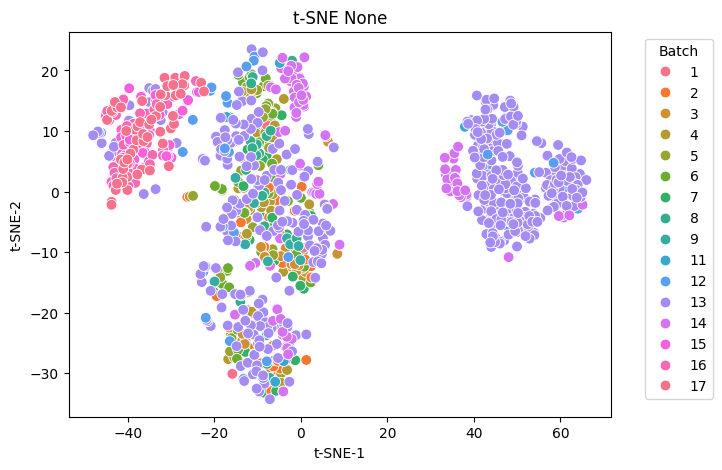

In [7]:
plot(data_before, metadata_before, plot_type='tsne', name='after_batch_correction')


# Oversampling (the controls)

## Sampling methods

In [1]:
# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

### Step 2: Create Imbalanced Dataset for Classification Model

In [ ]:
##########################
# Create an imbalanced dataset
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=[0.995, 0.005], class_sep=0.5, random_state=0)
# Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
# Check the target distribution
df['target'].value_counts(normalize = True)

In [5]:

dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file with the 'sex' column
metadata_path = './metadata_v3.csv'
df_metadat = pd.read_csv(metadata_path)
df_metadata = df_metadat[(df_metadat['study'] == 'ROSMAP')]

# Select features from the dataset file
X = df_features

# Select the 'sex' column from the metadata file as 'y'
y = df_metadata['diagnosis']

# Create a new dataframe combining features and target
df = pd.concat([X, y.rename('target')], axis=1)

# Check the target distribution
df['target'].value_counts(normalize=True)


target
1.0    0.646688
0.0    0.353312
Name: proportion, dtype: float64

In [ ]:
# With clinical variables
import pandas as pd

# Load the gene expression data
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = './metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path)

# Filter the metadata for the 'ROSMAP' study
df_metadata = df_metadata[df_metadata['study'] == 'ROSMAP']

# Drop the 'xx' column from the metadata (if it exists)
df_metadata = df_metadata.drop(columns=['individualID', 'race', 'spanish'], errors='ignore')

# Merge the metadata with the gene expression data based on the SpecimenID and index
df_merged = df_features.merge(df_metadata, left_on=df_features.index, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['diagnosis', 'specimenID', 'study', 'ethnicity'])

# Create a new dataframe combining features and target
df = pd.concat([X, y.rename('target')], axis=1)

# Check the target distribution
print(df['target'].value_counts(normalize=True))


In [31]:
metadata_path = './metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path)

# Filter the metadata for the 'ROSMAP' study
df_metadata = df_metadata[df_metadata['study'] == 'ROSMAP']
df_metadata.columns

Index(['specimenID', 'individualID', 'diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele', 'sex', 'batch', 'pmi', 'RIN', 'RIN2', 'age_death',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study'],
      dtype='object')

In [ ]:
df_metadata[:20]

In [ ]:
#################################
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'feature1', y = 'feature2', hue = 'target', data = df)

In [ ]:
# UMAP instead

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset and metadata
dataset_path = './AMP_AD_datasets/ROSMAP_counts1_v4.csv'
metadata_path = './metadata_v3.csv'
df_features = pd.read_csv(dataset_path, index_col=0)
df_metadat = pd.read_csv(metadata_path)
df_metadata = df_metadat[(df_metadat['study'] == 'ROSMAP')]


# Select features and target
X = df_features
y = df_metadata['diagnosis'] # Adjust the mapping as needed

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# Create a DataFrame for the reduced data
df_umap = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
df_umap['diagnosis'] = y.values  # Add the target variable

# Visualize the reduced data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='diagnosis', data=df_umap, palette=['blue', 'red'])
plt.title('UMAP Projection of Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='diagnosis')
plt.show()


### Step 3: Train Test Split for Imbalanced Data

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 713
The number of records in the test dataset is 238
The training dataset has 264 records for the majority class and 449 records for the minority class.


### Step 4: Decide the Performance Metric for Classification Model

### Step 5: Baseline Random Forest Model for Imbalanced Data

In [ ]:
# This is the first count file (batch removal only) -- using only genes as features

# Train the random forest model
rf = RandomForestClassifier()
baseline_model = rf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, baseline_prediction))

In [ ]:
# Also using clincial variables as features
rf = RandomForestClassifier()
baseline_model = rf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, baseline_prediction))

In [ ]:
# This is the second batch removal file (residualized)

# Train the random forest model
rf = RandomForestClassifier()
baseline_model = rf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, baseline_prediction))

### Step 6: Random Oversampling for Imbalanced Dataset

In [ ]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

In [ ]:
# Oversampling with shrinkage parameter

In [ ]:
# Randomly over sample the minority class
ros = RandomOverSampler(shrinkage=2, random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

In [ ]:
# UMAP instead

In [ ]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_ros and y_train_ros are your feature matrix and target array after random over-sampling

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding_ros = reducer.fit_transform(X_train_ros)

# Create a DataFrame for the reduced data
df_umap_ros = pd.DataFrame(embedding_ros, columns=['UMAP1', 'UMAP2'])
df_umap_ros['target'] = y_train_ros  # Add the target variable

# Visualize the reduced data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='target', data=df_umap_ros, palette=['blue', 'red'])
plt.title('UMAP Projection of Random Over-Sampled Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Target')
plt.show()


In [ ]:
# For the first count file (batch effect)
# Train the random forest model
# rf = RandomForestClassifier()
ros_model = rf.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, ros_prediction))

In [ ]:
# This is for the second count file (residualized)
# Train the random forest model
rf = RandomForestClassifier()
ros_model = rf.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, ros_prediction))

In [ ]:
# This is for the model with shrinkage (dispersion)
rf = RandomForestClassifier()
ros_model = rf.fit(X_train_ros, y_train_ros)
ros_prediction = ros_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, ros_prediction))

### Step 7: SMOTE Oversampling for Imbalanced Dataset

In [7]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

[(0, 449), (1, 449)]


In [ ]:
###################################
df_smote = pd.DataFrame({'feature1': X_train_smote[:, 0], 'feature2': X_train_smote[:, 1], 'target': y_train_smote})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'feature1', y = 'feature2', hue = 'target', data = df_smote)
plt.title('SMOTE Over Sampling')

In [ ]:
# UMAP instead

In [ ]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_ros and y_train_ros are your feature matrix and target array after random over-sampling

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding_ros = reducer.fit_transform(X_train_smote)

# Create a DataFrame for the reduced data
df_umap_smote = pd.DataFrame(embedding_ros, columns=['UMAP1', 'UMAP2'])
df_umap_smote['target'] = y_train_smote  # Add the target variable

# Visualize the reduced data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='target', data=df_umap_smote, palette=['blue', 'red'])
plt.title('UMAP Projection of Random Over-Sampled Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Target')
plt.show()


In [10]:
# First count filev (batch effect)
# Train the random forest model
rf = RandomForestClassifier()
smote_model = rf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, smote_prediction))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61        72
           1       0.83      0.85      0.84       166

    accuracy                           0.77       238
   macro avg       0.73      0.72      0.73       238
weighted avg       0.77      0.77      0.77       238



In [ ]:
# Second count file (residualized)
smote_model = rf.fit(X_train_smote, y_train_smote)
smote_prediction = smote_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, smote_prediction))

In [11]:
# use next one

import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE
# Load the dataset with features
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file with the 'diagnosis' column
metadata_path = './metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path)
df_metadata = df_metadata[(df_metadata['study'] == 'ROSMAP')]

# Select features from the dataset file
X = df_features

# Select the 'diagnosis' column from the metadata file as 'y'
y = df_metadata['diagnosis']

# Store the original indices as strings
original_indices = X.index.astype(str)

# Apply SMOTE
ros = SMOTE(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a column for indices, initializing with a placeholder for generated samples
sample_indices = np.array([None] * len(X_resampled))

# Assign the original indices to the corresponding samples in the resampled dataset
sample_indices[:len(original_indices)] = original_indices

# Combine the resampled features, target, and sample indices into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['target'] = y_resampled
df_resampled['sample_index'] = sample_indices

# Save the resampled dataset to a CSV file
df_resampled.to_csv('ROSMAP_counts_v9_17k_SMOTE.csv', index=False)


/tmp/ipykernel_21081/3115065524.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['target'] = y_resampled
/tmp/ipykernel_21081/3115065524.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['sample_index'] = sample_indices


KeyboardInterrupt: 

In [ ]:
# USE next one!!

import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Load the dataset with features
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file with the 'diagnosis' column
metadata_path = './metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path)
df_metadata = df_metadata[(df_metadata['study'] == 'ROSMAP')]

# Select features from the dataset file
X = df_features

# Select the 'diagnosis' column from the metadata file as 'y'
y = df_metadata['diagnosis']

# Apply RandomOverSampler
ros = SMOTE(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Assign temporary unique names to the generated samples
X_resampled.index = X.index.tolist() + [f"generated_{i}" for i in range(1, len(X_resampled) - len(X) + 1)]

# Create a list to store new metadata rows
new_metadata_rows = []

# Iterate through the generated samples
for idx in X_resampled.index[len(X):]:
    # Find the original sample the generated sample was duplicated from (considering only the first 1000 columns)
    original_index = next((orig_idx for orig_idx, orig_row in X.iloc[:, :11].iterrows() if (orig_row == X_resampled.iloc[:, :11].loc[idx]).all()), None)
    
    # Update the index for the generated sample
    new_index = f"{original_index}_{idx}"
    X_resampled.rename(index={idx: new_index}, inplace=True)
    
    # Create a new row in the metadata with the updated index
    new_metadata_row = df_metadata[df_metadata['specimenID'] == original_index].iloc[0].copy()
    new_metadata_row['specimenID'] = new_index
    new_metadata_rows.append(new_metadata_row)

# Concatenate the new metadata rows to the original metadata DataFrame
df_metadata = pd.concat([df_metadata] + new_metadata_rows, ignore_index=True)

# Save the updated metadata and gene expression datasets
df_metadata.to_csv('./metadata_v9_rosmap_SMOTE.csv', index=False)
X_resampled.to_csv('ROSMAP_counts_v9_17k_SMOTE.csv', index_label='sample_index')


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the dataset with features
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file with the 'diagnosis' column
metadata_path = './metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path)
df_metadata = df_metadata[(df_metadata['study'] == 'ROSMAP')]

# Select features from the dataset file
X = df_features

# Select the 'diagnosis' column from the metadata file as 'y'
y = df_metadata['diagnosis']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create the updated metadata based on y_resampled
updated_metadata = pd.DataFrame({'specimenID': X_resampled.index, 'diagnosis': y_resampled})

# Save the updated metadata and gene expression datasets
updated_metadata.to_csv('./metadata_v9_rosmap_SMOTE.csv', index=False)
X_resampled.to_csv('ROSMAP_counts_v9_17k_SMOTE.csv', index_label='sample_index')


### Step 8: Random Under-Sampling for Imbalanced Dataset (Not needed)

In [ ]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

In [ ]:
# Convert the data from numpy array to a pandas dataframe
df_rus = pd.DataFrame({'feature1': X_train_rus[:, 0], 'feature2': X_train_rus[:, 1], 'target': y_train_rus})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'feature1', y = 'feature2', hue = 'target', data = df_rus)
plt.title('Random Under Sampling')

In [ ]:
# Train the random forest model
# rf = RandomForestClassifier()
rus_model = rf.fit(X_train_rus, y_train_rus)
rus_prediction = rus_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, rus_prediction))

## Random_sampling for my data

In [ ]:
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file with the 'sex' column
metadata_path = './metadata_v3.csv'
df_metadat = pd.read_csv(metadata_path)
df_metadata = df_metadat[(df_metadat['study'] == 'ROSMAP')]

# Select features from the dataset file
X = df_features

# Select the 'sex' column from the metadata file as 'y'
y = df_metadata['diagnosis']

In [ ]:
X.index

In [ ]:
# Use the next code

from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np

# Assuming 'X' is a DataFrame and 'y' is a Series or array

# Store the original indices
original_indices = X.index

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a column for indices, initializing with -1 for generated samples
sample_indices = np.full(len(X_resampled), -1)

# Assign the original indices to the corresponding samples in the resampled dataset
sample_indices[:len(original_indices)] = original_indices

# Combine the resampled features, target, and sample indices into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['target'] = y_resampled
df_resampled['sample_index'] = sample_indices

# Save the resampled dataset to a CSV file
df_resampled.to_csv('ROSMAP_counts_v5_oversamp', index=False)


In [ ]:
# One coherent code

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Load the dataset with features
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file with the 'diagnosis' column
metadata_path = './metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path)
df_metadata = df_metadata[(df_metadata['study'] == 'ROSMAP')]

# Select features from the dataset file
X = df_features

# Select the 'diagnosis' column from the metadata file as 'y'
y = df_metadata['diagnosis']

# Store the original indices as strings
original_indices = X.index.astype(str)

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a column for indices, initializing with a placeholder for generated samples
sample_indices = np.array([None] * len(X_resampled))

# Assign the original indices to the corresponding samples in the resampled dataset
sample_indices[:len(original_indices)] = original_indices

# Combine the resampled features, target, and sample indices into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['target'] = y_resampled
df_resampled['sample_index'] = sample_indices

# Save the resampled dataset to a CSV file
df_resampled.to_csv('ROSMAP_counts_v5_oversamp.csv', index=False)


In [21]:
# A new code to try!

In [8]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Load the dataset with features
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file with the 'diagnosis' column
metadata_path = './metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path)
df_metadata = df_metadata[(df_metadata['study'] == 'ROSMAP')]

# Select features from the dataset file
X = df_features

# Select the 'diagnosis' column from the metadata file as 'y'
y = df_metadata['diagnosis']

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Assign temporary unique names to the generated samples
X_resampled.index = X.index.tolist() + [f"generated_{i}" for i in range(1, len(X_resampled) - len(X) + 1)]

# Create a list to store new metadata rows
new_metadata_rows = []

# Iterate through the generated samples
for idx in X_resampled.index[len(X):]:
    # Find the original sample the generated sample was duplicated from
    original_index = next((orig_idx for orig_idx, orig_row in X.iterrows() if (orig_row == X_resampled.loc[idx]).all()), None)
    
    # Update the index for the generated sample
    new_index = f"{original_index}_{idx}"
    X_resampled.rename(index={idx: new_index}, inplace=True)
    
    # Create a new row in the metadata with the updated index
    new_metadata_row = df_metadata[df_metadata['specimenID'] == original_index].iloc[0].copy()
    new_metadata_row['specimenID'] = new_index
    new_metadata_rows.append(new_metadata_row)

# Concatenate the new metadata rows to the original metadata DataFrame
df_metadata = pd.concat([df_metadata] + new_metadata_rows, ignore_index=True)

# Save the updated metadata and gene expression datasets
df_metadata.to_csv('./metadata_v6_rosmap.csv', index=False)
X_resampled.to_csv('ROSMAP_counts_v6.csv', index_label='sample_index')


KeyboardInterrupt: 

### Oversampling and updating indices

In [ ]:
# A faster approach
# USE this one!!

import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Load the dataset with features
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file with the 'diagnosis' column
metadata_path = './metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path)
df_metadata = df_metadata[(df_metadata['study'] == 'ROSMAP')]

# Select features from the dataset file
X = df_features

# Select the 'diagnosis' column from the metadata file as 'y'
y = df_metadata['diagnosis']

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Assign temporary unique names to the generated samples
X_resampled.index = X.index.tolist() + [f"generated_{i}" for i in range(1, len(X_resampled) - len(X) + 1)]

# Create a list to store new metadata rows
new_metadata_rows = []

# Iterate through the generated samples
for idx in X_resampled.index[len(X):]:
    # Find the original sample the generated sample was duplicated from (considering only the first 1000 columns)
    original_index = next((orig_idx for orig_idx, orig_row in X.iloc[:, :11].iterrows() if (orig_row == X_resampled.iloc[:, :11].loc[idx]).all()), None)
    
    # Update the index for the generated sample
    new_index = f"{original_index}_{idx}"
    X_resampled.rename(index={idx: new_index}, inplace=True)
    
    # Create a new row in the metadata with the updated index
    new_metadata_row = df_metadata[df_metadata['specimenID'] == original_index].iloc[0].copy()
    new_metadata_row['specimenID'] = new_index
    new_metadata_rows.append(new_metadata_row)

# Concatenate the new metadata rows to the original metadata DataFrame
df_metadata = pd.concat([df_metadata] + new_metadata_rows, ignore_index=True)

# Save the updated metadata and gene expression datasets
df_metadata.to_csv('./metadata_v6_rosmap.csv', index=False)
X_resampled.to_csv('ROSMAP_counts_v6.csv', index_label='sample_index')


### Modify the metadata for adding clinical variables

In [11]:
xx = pd.read_csv('./metadata_v3.csv')
df_metadata = xx[(xx['study'] == 'ROSMAP')]
df_gene_expression = pd.read_csv('ROSMAP_counts_v6.csv', index_col=0)


In [ ]:
df_gene_expression

In [15]:
import pandas as pd

# Iterate through the indices of the gene expression dataset from slice 950 forward
for idx in df_gene_expression.index[950:]:
    if '_generated_' in idx:
        # Extract the original sample name from the index
        original_sample_name = idx.split('_generated_')[0]
        
        # Find the corresponding row in the metadata
        metadata_row = df_metadata[df_metadata['specimenID'] == original_sample_name]
        
        # If a matching row is found, duplicate it and update the specimenID
        if not metadata_row.empty:
            new_metadata_row = metadata_row.copy()
            new_metadata_row['specimenID'] = idx
            df_metadata = pd.concat([df_metadata, new_metadata_row], ignore_index=True)

# Save the updated metadata file
df_metadata.to_csv('metadata_v6_rosmap.csv', index=False)


## Adding clinical variable info to the random sampling data

In [2]:
import pandas as pd
import numpy as np

In [ ]:
x = pd.read_csv('metadata_v6_rosmap.csv', index_col=0)
x
# "ROSMAP_counts_v5_oversamp.csv"

In [ ]:
print(x.index)
num_unique_indices = x.index.nunique()
print("Number of unique indices:", num_unique_indices)
print(x.index[950:963])

In [ ]:
x[950:960]

In [ ]:
import pandas as pd

# Load the gene expression data
df_gene_expr = pd.read_csv("ROSMAP_counts_v5_oversamp.csv", index_col="sample_index")

# Remove the 'target' column from the gene expression DataFrame
df_gene_expr = df_gene_expr.drop(columns=['target'], errors='ignore')

# Create a copy of the gene expression DataFrame with only the first 1000 columns
df_gene_expr_subset = df_gene_expr.iloc[:, :1000]

# Dictionary to store the count of occurrences for each unique row
row_counts = {}

# Iterate over the rows in the subset
for idx, row in df_gene_expr_subset.iterrows():
    # Convert the row to a tuple to make it hashable
    row_tuple = tuple(row)
    # Increment the count for this row
    row_counts[row_tuple] = row_counts.get(row_tuple, 0) + 1

# Identify rows that have been duplicated more than once
duplicated_rows = {row: count for row, count in row_counts.items() if count > 1}

# Print the duplicated rows and their counts
print("Duplicated rows and their counts:")
# for row, count in duplicated_rows.items():
#     print(f"{row}: {count} times")

# Print the total number of unique rows that have been duplicated
print(f"Total unique rows duplicated more than once: {len(duplicated_rows)}")


In [ ]:
xx = pd.read_csv('metadata_v6_rosmap.csv')
df_metadata = xx[(xx['study'] == 'ROSMAP')]
xx

In [ ]:
# A new code for adding variable info (both files)

In [10]:
import pandas as pd

# Load the gene expression data
df = pd.read_csv("ROSMAP_counts_v6.csv", index_col="sample_index")

# Check the number of duplicated rows
num_duplicated_rows = df.duplicated().sum()

# Print the number of duplicated rows
print(f"Number of duplicated rows: {num_duplicated_rows}")


Number of duplicated rows: 279


# Select genes set using MAD (mean absolute deviation)

In [ ]:
import pandas as pd
dataset_path = 'ROSMAP_counts_v9_17k_SMOTE.csv'
df = pd.read_csv(dataset_path, index_col=0)
df

In [11]:
# Check for NULL values in the dataset
null_values_exist = df.isnull().any().any()

if null_values_exist:
    print("There are NULL values in the dataset.")
else:
    print("There are no NULL values in the dataset.")

There are no NULL values in the dataset.


In [ ]:
import pandas as pd
from statsmodels.robust.scale import mad

# Calculate the Median Absolute Deviation (MAD) for each gene (column)
mad_values = df.apply(mad, axis=0)

# Rank the genes based on MAD values from most variable to least variable
ranked_genes = mad_values.sort_values(ascending=False).index.tolist()

least_variable_genes = ranked_genes[-4000:]
most_variable_genes = ranked_genes[:2000]

# Print the ranked list of genes
print("Ranked genes from most variable to least variable:" )
print(ranked_genes)
print("Least variable:")
print(least_variable_genes)
print('Most variable:')
print(most_variable_genes)


In [ ]:
# For biomart

import pandas as pd
from statsmodels.robust.scale import mad

# Calculate the Median Absolute Deviation (MAD) for each gene (column)
mad_values = df.apply(mad, axis=0)

# Rank the genes based on MAD values from most variable to least variable
ranked_genes = mad_values.sort_values(ascending=False).index.tolist()

# Get the least variable and most variable genes
least_variable_genes = ranked_genes[-4000:]
most_variable_genes = ranked_genes[:2000]

# Format the gene names for BioMart
least_variable_genes_formatted = ', '.join(least_variable_genes)
most_variable_genes_formatted = ', '.join(most_variable_genes)

# Print the formatted gene names
print("Formatted least variable genes for BioMart:")
print(least_variable_genes_formatted)
print("\nFormatted most variable genes for BioMart:")
print(most_variable_genes_formatted)


## Removing least vareiable genes (4000)

In [13]:
import pandas as pd

dataset_path = 'ROSMAP_counts_v9_17k_SMOTE.csv'
df = pd.read_csv(dataset_path, index_col=0)


# Remove the columns corresponding to the genes in the list
df_filtered = df.drop(columns=least_variable_genes)

# Save the filtered DataFrame to a new CSV file
new_csv_file_path = 'ROSMAP_counts_v9_13k_SMOTE.csv'
df_filtered.to_csv(new_csv_file_path, index=True)


In [72]:
import pandas as pd
dataset_path = 'ROSMAP_counts_v8_original_13k.csv'
df = pd.read_csv(dataset_path, index_col=0)
df

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000287978,ENSG00000287985,ENSG00000288011,ENSG00000288025,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288075,ENSG00000288107
487_120515,2.693056,4.008124,3.843684,1.891460,2.131878,5.089801,2.564877,4.163159,4.105802,4.275373,...,1.892324,0.680168,1.689954,2.831027,0.617244,1.545664,-0.547594,3.269352,4.395686,2.913610
182_120424,2.952038,4.146917,3.819310,1.672045,1.707203,3.071029,3.198746,5.275337,4.577458,4.262465,...,1.396146,1.114917,1.750664,2.448238,0.277121,0.514422,0.597116,3.664030,3.934631,2.502630
193_120424,2.935881,4.394735,4.399317,1.909150,1.711887,3.485700,3.305756,5.022003,4.313655,4.688572,...,1.281214,1.294638,2.047225,1.919104,0.219337,-0.596076,-5.247300,3.774892,3.034315,1.800074
694_120605,3.970723,3.811088,3.519447,1.613139,3.515993,4.746188,3.800684,5.696683,4.843922,3.624694,...,-2.986291,-0.357597,1.358419,1.261599,-0.455351,1.506439,-0.391900,3.188582,3.419970,0.863133
366_120502,3.555162,3.863562,3.737334,2.403238,4.053856,5.039985,3.336166,5.500272,4.573848,4.143737,...,1.707821,1.329693,1.540511,2.377912,0.960361,0.552581,-5.109539,3.378009,3.621923,1.674681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,3.480599,4.551965,3.794995,2.044125,2.658725,5.550509,3.364785,4.804389,4.476099,4.117583,...,2.346634,0.917420,1.872746,2.475703,0.227905,-0.805499,-4.915610,4.155401,3.197329,2.047402
RISK_9_rerun,3.033182,3.598383,3.430243,1.701873,2.982793,3.559018,3.009816,5.052380,4.491756,4.041375,...,0.084201,0.165583,1.214401,1.854056,0.874431,1.085004,-5.813749,2.268562,3.611761,0.364139
RISK_93,4.234210,4.465530,4.319146,2.264421,2.106420,4.098086,3.708144,5.490788,4.406034,3.908534,...,1.726131,1.341263,2.480019,1.947281,-1.029335,0.544776,-3.861985,4.389101,3.446107,1.381710
RISK_94,4.074123,4.374235,4.164492,2.307973,1.930466,4.041678,3.714398,5.463185,4.406323,4.232183,...,1.195124,0.974912,2.112795,2.120084,0.340579,0.772254,-5.215149,3.750806,3.277829,0.504551


# ML model (use the next section!)

## Only genes as features

### Old RF model (basic)

In [16]:

dataset_path = '/home/vmottaqi/rnaseq_synapse/metadata_v6_rosmap.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file with the 'sex' column
metadata_path = './metadata_v6_rosmap.csv'
df_metadata = pd.read_csv(metadata_path, index_col="specimenID")

# Select features from the dataset file
X = df_features

# Select the 'sex' column from the metadata file as 'y'
y = df_metadata['diagnosis']

# Create a new dataframe combining features and target
df = pd.concat([X, y.rename('target')], axis=1)

# Check the target distribution
df['target'].value_counts(normalize=True)


target
0    0.5
1    0.5
Name: proportion, dtype: float64

In [ ]:
df_features

In [ ]:
df_metadata

In [ ]:
# With clinical variables
import pandas as pd

# Load the gene expression data
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = './metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path)

# Filter the metadata for the 'ROSMAP' study
df_metadata = df_metadata[df_metadata['study'] == 'ROSMAP']

# Drop the 'xx' column from the metadata (if it exists)
df_metadata = df_metadata.drop(columns=['individualID', 'race', 'spanish'], errors='ignore')

# Merge the metadata with the gene expression data based on the SpecimenID and index
df_merged = df_features.merge(df_metadata, left_on=df_features.index, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['diagnosis', 'specimenID', 'study', 'ethnicity'])

# Create a new dataframe combining features and target
df = pd.concat([X, y.rename('target')], axis=1)

# Check the target distribution
print(df['target'].value_counts(normalize=True))


In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

NameError: name 'train_test_split' is not defined

In [ ]:
# Train the random forest model (without clincial)
rf = RandomForestClassifier()
baseline_model = rf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)
# Check the model performance
print(classification_report(y_test, baseline_prediction))

# ML model (RF) -- baseline

## Baseline RF for comparison (w cross-validation)

### 1. Without clinical vars

In [1]:
# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Load the dataset and metadata
dataset_path = '/home/vmottaqi/rnaseq_synapse/ROSMAP_counts_v7.csv'
df_features = pd.read_csv(dataset_path, index_col=0)
df_features

In [31]:
num_unique_indices = df_features.index.nunique()
print("Number of unique indices:", num_unique_indices)

Number of unique indices: 1230


In [1]:
metadata_path = 'metadata_v6_rosmap.csv'  # This seems to be the same as dataset_path, double-check if this is correct
df_metadata = pd.read_csv(metadata_path, index_col=0)
df_metadata

NameError: name 'pd' is not defined

In [11]:
df_metadata.columns

Index(['individualID', 'diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele', 'sex', 'batch', 'pmi', 'RIN', 'RIN2', 'age_death',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study'],
      dtype='object')

In [33]:
num_unique_indices = df_metadata.index.nunique()
print("Number of unique indices:", num_unique_indices)

Number of unique indices: 1230


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Select features and target
X = df_features
y = df_metadata['diagnosis']

# Create a new dataframe combining features and target
df = pd.concat([X, y.rename('target')], axis=1)

# Check the target distribution
print(df['target'].value_counts(normalize=True))


target
0    0.5
1    0.5
Name: proportion, dtype: float64


In [5]:
# Without any clinical

from sklearn.model_selection import cross_validate

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the metrics to use
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']

# Perform 4-fold cross-validation with multiple metrics
cv_results = cross_validate(rf, X, y, cv=10, scoring=scoring_metrics)

# Print the cross-validation results for each metric
for metric in scoring_metrics:
    #print(f"10-fold CV {metric}: {cv_results['test_' + metric]}")
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")


Mean CV recall: 0.760946589106293

Mean CV f1: 0.8105418223415881

Mean CV accuracy: 0.8203252032520325

Mean CV precision: 0.8770813086178112

Mean CV roc_auc: 0.9327868852459016



### 2. With clinical vars

In [12]:
### With clinical variables

import pandas as pd

# Load the gene expression data
dataset_path = 'ROSMAP_counts_v6.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'metadata_v6_rosmap.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)


# Drop the 'xx' column from the metadata (if it exists)
df_metadata = df_metadata.drop(columns=['individualID', 'race', 'spanish', 'pmi', "RIN", 'study', 'ethnicity','AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study'], errors='ignore')

# Merge the metadata with the gene expression data based on the SpecimenID and index
df_merged = df_features.merge(df_metadata, left_on=df_features.index, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['diagnosis', 'specimenID'])

# Create a new dataframe combining features and target
df = pd.concat([X, y.rename('target')], axis=1)

# Check the target distribution
print(df['target'].value_counts(normalize=True))


target
0    0.5
1    0.5
Name: proportion, dtype: float64


In [13]:
### With clinical variables

from sklearn.model_selection import cross_validate

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the metrics to use
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']

# Perform 4-fold cross-validation with multiple metrics
cv_results = cross_validate(rf, X, y, cv=10, scoring=scoring_metrics)

# Print the cross-validation results for each metric
for metric in scoring_metrics:
    #print(f"10-fold CV {metric}: {cv_results['test_' + metric]}")
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")

Mean CV recall: 0.7690375462718138

Mean CV f1: 0.8200242502359938

Mean CV accuracy: 0.8308943089430894

Mean CV precision: 0.8877675229370962

Mean CV roc_auc: 0.934690639873083



### Improvement of baseline RF (Hyperparameters)

## Creating small dataset for test (10 samples)

In [10]:
import pandas as pd

dataset_path = '/home/vmottaqi/rnaseq_synapse/ROSMAP_counts_v6.csv'
df = pd.read_csv(dataset_path, index_col=0)

# Select the first 5 rows
first_five = df.head(6)
last_five = df.tail(6)

# Concatenate the two DataFrames
concatenated_main_df = pd.concat([first_five, last_five])

df_diagnosis = pd.read_csv('metadata_v6_rosmap.csv', index_col=0)

# Select the first 5 rows and the last 5 rows of the 'diagnosis' column
first_five_diagnosis = df_diagnosis[['diagnosis']].head(6)
last_five_diagnosis = df_diagnosis[['diagnosis']].tail(6)

# Concatenate the two subsets from the diagnosis DataFrame
concatenated_diagnosis_df = pd.concat([first_five_diagnosis, last_five_diagnosis])

# Combine the subsets from the main and diagnosis DataFrames
# Make sure to reset the index to allow proper horizontal concatenation
final_df = pd.concat([concatenated_main_df.reset_index(drop=True), 
                      concatenated_diagnosis_df.reset_index(drop=True)], axis=1)


# Export the new DataFrame to a CSV file
final_df.to_csv('test_11samples_v6.csv', index=True)


In [ ]:
df = pd.read_csv('test_11samples_v6.csv', index_col=0)
df

# RF, Cross-validation

## First try on small dataset

In [3]:
dataset = pd.read_csv('test_11samples_v6.csv', index_col=0)
y = dataset['diagnosis']
X = dataset.drop('diagnosis', axis=1)


In [4]:
# First try
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
import shap
import numpy as np
import pandas as pd

np.random.seed(1)  # Reproducibility

shap_values_per_sample = dict()
CV = LeaveOneOut()

for fold_num, (train_ix, test_ix) in enumerate(CV.split(X)):
    print('\n------ Fold Number:', fold_num)
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(random_state=1)
    fit = model.fit(X_train, y_train)
    y_pred = fit.predict(X_test)
    correct = y_pred[0] == y_test.iloc[0]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    shap_values_per_sample[test_ix[0]] = {'correct': correct, 'label': y_test.iloc[0], 'shap_values': shap_values[1] if y_pred[0] == 1 else shap_values[0]}

    print('Correctly Classified:', correct)

# Filter the dictionary for correctly classified samples
# correct_shap_values = {sample: info for sample, info in shap_values_per_sample.items() if info['correct']}



------ Fold Number: 0
Correctly Classified: True

------ Fold Number: 1
Correctly Classified: False

------ Fold Number: 2
Correctly Classified: False

------ Fold Number: 3
Correctly Classified: True

------ Fold Number: 4
Correctly Classified: False

------ Fold Number: 5
Correctly Classified: False

------ Fold Number: 6
Correctly Classified: True

------ Fold Number: 7
Correctly Classified: True

------ Fold Number: 8
Correctly Classified: True

------ Fold Number: 9
Correctly Classified: True

------ Fold Number: 10
Correctly Classified: True

------ Fold Number: 11
Correctly Classified: True


In [15]:
print(shap_values_per_sample[1]['shap_values'])

[[0. 0. 0. ... 0. 0. 0.]]


In [18]:
sample_index = 3
shap_values_for_sample = shap_values_per_sample[sample_index]['shap_values']

# Find non-zero SHAP values and their indices
if shap_values_for_sample is not None:
    non_zero_shap_values = [(index, value) for index, value in enumerate(shap_values_for_sample[0]) if value != 0]
    print("Non-zero SHAP values and their indices:", non_zero_shap_values)
else:
    print("SHAP values are None for this sample.")


Non-zero SHAP values and their indices: [(710, -0.007272727272727273), (1059, 0.004545454545454546), (1144, 0.004545454545454546), (1471, 0.0018181818181818177), (1603, 0.004545454545454546), (1608, 0.002727272727272727), (2072, 0.0009090909090909094), (2141, -0.008181818181818182), (2160, 0.0009090909090909094), (2347, 0.0036363636363636364), (2419, 0.0036363636363636364), (2492, -0.008181818181818182), (2556, -0.008181818181818182), (2739, -0.0004545454545454545), (2860, 0.005454545454545454), (2901, -0.007272727272727273), (3091, 0.0018181818181818177), (3317, -0.007272727272727273), (3392, -0.007272727272727273), (3584, -0.008181818181818182), (3657, 0.005818181818181819), (3774, 0.004545454545454546), (4146, -0.008181818181818182), (4202, 0.002727272727272727), (5101, 0.004545454545454546), (5171, -0.007272727272727273), (5217, 0.0036363636363636364), (5405, -0.005454545454545454), (5431, -0.006363636363636364), (5630, 0.002727272727272727), (5713, 0.006363636363636364), (5980, -0

In [19]:
print(len(non_zero_shap_values))

97


In [22]:
sample_index = 3
shap_values_for_sample = shap_values_per_sample[sample_index]['shap_values']

# Find indices of features with the largest SHAP values
if shap_values_for_sample is not None:
    # Get absolute values of SHAP values
    abs_shap_values = np.abs(shap_values_for_sample[0])

    # Find the indices of the features with the largest SHAP values
    largest_shap_indices = np.argsort(-abs_shap_values)[:100]  # Change 20 to the number of features you want

    print("Indices of features with the largest SHAP values:", largest_shap_indices)
else:
    print("SHAP values are None for this sample.")


Indices of features with the largest SHAP values: [12759  3584  4146  2141  2492 12744  2556  8323  8986 14589  8628  3317
  5171  2901 14195   710  3392 13153 13818  8708  5713 12118  5980 11429
 12341  7588 15495  5431 14176  3657 15915  7241 13292 14426  2860  5405
 13357 11959 15961  1059  8439  1144  3774  7133 10512  1603  5101 16168
  9022  9932 12021 12678  8148 14246  2347  2419  5217 10240  6587  7021
 11031 16839 15566  1608  6285  4202  5630 11036 16760 11200 16153 15310
 10754 13011 12417 11856 15230 16615  3091 15013 12604  7840 12419  6096
  1471 15887 10456 14069 13696 16757 13700 10406  2160 16601  2072  8403
  2739 11335 11333 11334]


#### With accuracy metrics

In [23]:
dataset = pd.read_csv('test_11samples_v6.csv', index_col=0)
y = dataset['diagnosis']
X = dataset.drop('diagnosis', axis=1)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
import shap
import numpy as np
import pandas as pd

np.random.seed(1)  # Reproducibility

shap_values_per_sample = dict()
true_labels = []
predicted_labels = []
CV = LeaveOneOut()

for fold_num, (train_ix, test_ix) in enumerate(CV.split(X)):
    print('\n------ Fold Number:', fold_num)
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(random_state=1)
    fit = model.fit(X_train, y_train)
    y_pred = fit.predict(X_test)
    correct = y_pred[0] == y_test.iloc[0]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    shap_values_per_sample[test_ix[0]] = {'correct': correct, 'label': y_test.iloc[0], 'shap_values': shap_values[1] if y_pred[0] == 1 else shap_values[0]}
    true_labels.append(y_test.iloc[0])
    predicted_labels.append(y_pred[0])

    print('Correctly Classified:', correct)

# Print classification report
print()
report = classification_report(true_labels, predicted_labels, target_names=['Control', 'AD'])
print(report)



------ Fold Number: 0
Correctly Classified: True

------ Fold Number: 1
Correctly Classified: False

------ Fold Number: 2
Correctly Classified: False

------ Fold Number: 3
Correctly Classified: True

------ Fold Number: 4
Correctly Classified: False

------ Fold Number: 5
Correctly Classified: False

------ Fold Number: 6
Correctly Classified: True

------ Fold Number: 7
Correctly Classified: True

------ Fold Number: 8
Correctly Classified: True

------ Fold Number: 9
Correctly Classified: True

------ Fold Number: 10
Correctly Classified: True

------ Fold Number: 11
Correctly Classified: True

              precision    recall  f1-score   support

     Control       0.73      0.89      0.80         9
          AD       0.00      0.00      0.00         3

    accuracy                           0.67        12
   macro avg       0.36      0.44      0.40        12
weighted avg       0.55      0.67      0.60        12



#### With predictive score for each sample

In [26]:
dataset = pd.read_csv('test_11samples_v6.csv', index_col=0)
y = dataset['diagnosis']
X = dataset.drop('diagnosis', axis=1)

In [4]:
dataset_path = '/home/vmottaqi/rnaseq_synapse/ROSMAP_counts_v6.csv'
X = pd.read_csv(dataset_path, index_col=0)

metadata = pd.read_csv('metadata_v6_rosmap.csv', index_col=0)
y = metadata[['diagnosis']]

In [ ]:
X

In [6]:
y

,diagnosis
specimenID,
487_120515,0
182_120424,0
193_120424,1
694_120605,0
366_120502,1
...,...
Sample_R3633816-DLPFC_generated_275,0
Sample_R4841941-AC_generated_276,0
152_120419_generated_277,0


In [9]:
# Modified

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
import shap
import numpy as np
import pandas as pd

dataset_path = '/home/vmottaqi/rnaseq_synapse/ROSMAP_counts_v6.csv'
X = pd.read_csv(dataset_path, index_col=0)

metadata = pd.read_csv('metadata_v6_rosmap.csv', index_col=0)
y = metadata['diagnosis']  # Convert to 1D array


np.random.seed(1)  # Reproducibility

shap_values_per_sample = dict()
true_labels = []
predicted_labels = []
CV = LeaveOneOut()

for fold_num, (train_ix, test_ix) in enumerate(CV.split(X)):
    print('--- Fold Number:', fold_num)
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(random_state=1)
    fit = model.fit(X_train, y_train.ravel())  # Convert to 1D array
    y_pred = fit.predict(X_test)
    y_proba = fit.predict_proba(X_test)[0]  # Get the probability estimates for each class
    correct = y_pred[0] == y_test.iloc[0]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    shap_values_per_sample[test_ix[0]] = {
        'correct': correct,
        'label': y_test.iloc[0],
        'shap_values': shap_values[1] if y_pred[0] == 1 else shap_values[0],
        'predictive_score': y_proba[1]  # Probability estimate for the positive class (AD)
    }
    true_labels.append(y_test.iloc[0])
    predicted_labels.append(y_pred[0])

    #print('Correctly Classified:', correct)

# Print classification report
report = classification_report(true_labels, predicted_labels, target_names=['Control', 'AD'])
print(report)


--- Fold Number: 0


KeyboardInterrupt: 

In [31]:
shap_values_per_sample[3]

{'correct': True,
 'label': 0,
 'shap_values': array([[0., 0., 0., ..., 0., 0., 0.]]),
 'predictive_score': 0.35}

#### Optimizing the hyperparameters

In [10]:
dataset_path = '/home/vmottaqi/rnaseq_synapse/ROSMAP_counts_v7.csv'
X = pd.read_csv(dataset_path, index_col=0)

metadata = pd.read_csv('metadata_v6_rosmap.csv', index_col=0)
y = metadata['diagnosis']  # Convert to 1D array

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, precision_score

# Define the parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=1)

# Create a precision scorer
precision_scorer = make_scorer(precision_score, pos_label=1)

# Set up the random search with 5-fold cross-validation and 100 iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring=precision_scorer, cv=5, n_iter=100, verbose=2, n_jobs=3, random_state=1)

# Fit the random search to the data
random_search.fit(X, y)

# Print the best parameters and the best precision score
print("Best parameters:", random_search.best_params_)
print("Best precision score:", random_search.best_score_)


## Final RF model and SHAP on large dataset

In [15]:
dataset_path = 'ROSMAP_counts_v9_13k_SMOTE.csv'
X = pd.read_csv(dataset_path, index_col=0).reset_index(drop=True)

metadata = pd.read_csv('metadata_v9_rosmap_SMOTE.csv', index_col=0).reset_index(drop=True)
y = metadata['diagnosis']



In [16]:
metadata

,diagnosis
0,0
1,0
2,1
3,0
4,1
...,...
1225,0
1226,0
1227,0
1228,0


In [ ]:
X

In [47]:
dataset_path = '/home/vmottaqi/rnaseq_synapse/ROSMAP_counts_v7.csv'
X = pd.read_csv(dataset_path, index_col=0)

In [ ]:
X

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
import shap
import numpy as np
import pandas as pd
import pickle

dataset_path = '/home/vmottaqi/rnaseq_synapse/ROSMAP_counts_v7.csv'
X = pd.read_csv(dataset_path, index_col=0)

metadata = pd.read_csv('/home/vmottaqi/rnaseq_synapse/metadata_v6_rosmap.csv', index_col=0)
y = metadata['diagnosis']  # Convert to 1D array

np.random.seed(1)  # Reproducibility

shap_values_per_sample = dict()
true_labels = []
predicted_labels = []
CV = LeaveOneOut()

for fold_num, (train_ix, test_ix) in enumerate(CV.split(X)):
    print('--- Fold Number:', fold_num)
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    # Apply the best hyperparameters
    model = RandomForestClassifier(
        n_estimators=500,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=1
    )
    fit = model.fit(X_train, y_train.ravel())  # Convert to 1D array
    y_pred = fit.predict(X_test)
    y_proba = fit.predict_proba(X_test)[0]  # Get the probability estimates for each class
    correct = y_pred[0] == y_test.iloc[0]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    shap_values_per_sample[test_ix[0]] = {
        'correct': correct,
        'label': y_test.iloc[0],
        'shap_values': shap_values[1] if y_pred[0] == 1 else shap_values[0],
        'predictive_score': y_proba[1]  # Probability estimate for the positive class (AD)
    }
    true_labels.append(y_test.iloc[0])
    predicted_labels.append(y_pred[0])

    #print('Correctly Classified:', correct)

# Print classification report
report = classification_report(true_labels, predicted_labels, target_names=['Control', 'AD'])
print(report)


with open('shap_values_per_sample.pkl', 'wb') as f:
    pickle.dump(shap_values_per_sample, f)

print('SHAP values dictionary saved to shap_values_per_sample.pkl')

--- Fold Number: 0


KeyboardInterrupt: 

### W parallelization (final)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
import shap
import numpy as np
import pandas as pd
import pickle
from joblib import Parallel, delayed

def process_fold(train_ix, test_ix, X, y):
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=6,
        random_state=1
    )
    fit = model.fit(X_train, y_train.ravel())
    y_pred = fit.predict(X_test)
    y_proba = fit.predict_proba(X_test)[0]
    correct = y_pred[0] == y_test.iloc[0]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    print('Fold number {} completed'.format(test_ix[0]))  # Print the completed fold number

    return {
        'fold_num': test_ix[0],
        'correct': correct,
        'label': y_test.iloc[0],  # Keeping only 'label' for the true label
        'shap_values': shap_values[1] if y_pred[0] == 1 else shap_values[0],
        'predictive_score': y_proba[1],
        'predicted_label': y_pred[0]
    }

dataset_path = '/home/vmottaqi/rnaseq_synapse/ROSMAP_counts_v7_9k.csv'
X = pd.read_csv(dataset_path, index_col=0)
metadata = pd.read_csv('metadata_v6_rosmap.csv', index_col=0)
y = metadata['diagnosis']

np.random.seed(1)

CV = LeaveOneOut()
results = Parallel(n_jobs=4)(delayed(process_fold)(train_ix, test_ix, X, y) for train_ix, test_ix in CV.split(X))

shap_values_per_sample = {result['fold_num']: result for result in results}
true_labels = [result['label'] for result in results]
predicted_labels = [result['predicted_label'] for result in results]

report = classification_report(true_labels, predicted_labels, target_names=['Control', 'AD'])
print(report)

with open('shap_values_9_9k.pkl', 'wb') as f:
    pickle.dump(shap_values_per_sample, f)

print('SHAP values dictionary saved to shap_values_9.pkl')


Fold number 0 completed
Fold number 1 completed
Fold number 2 completed
Fold number 4 completed
Fold number 3 completed
Fold number 5 completed


KeyboardInterrupt: 

In [ ]:
# on original dataset (13k genes)

In [63]:
dataset_path = 'ROSMAP_counts_v8_original_13k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file with the 'sex' column
metadata_path = './metadata_v3.csv'
df_metadat = pd.read_csv(metadata_path)
df_metadata = df_metadat[(df_metadat['study'] == 'ROSMAP')]

In [ ]:
df_features

In [ ]:
df_metadata

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
import shap
import numpy as np
import pandas as pd
import pickle
from joblib import Parallel, delayed

def process_fold(train_ix, test_ix, X, y):
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(random_state=1)
    fit = model.fit(X_train, y_train.ravel())
    y_pred = fit.predict(X_test)
    y_proba = fit.predict_proba(X_test)[0]
    correct = y_pred[0] == y_test.iloc[0]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    print('Fold number {} completed'.format(test_ix[0]))  # Print the completed fold number

    return {
        'fold_num': test_ix[0],
        'correct': correct,
        'label': y_test.iloc[0],  # Keeping only 'label' for the true label
        'shap_values': shap_values[1] if y_pred[0] == 1 else shap_values[0],
        'predictive_score': y_proba[1],
        'predicted_label': y_pred[0]
    }


dataset_path = 'ROSMAP_counts_v8_original_13k.csv'
X = pd.read_csv(dataset_path, index_col=0)

metadata = pd.read_csv('./metadata_v3.csv', index_col=0)
df_metadata = metadata[(metadata['study'] == 'ROSMAP')]
y = df_metadata['diagnosis']


np.random.seed(1)

CV = LeaveOneOut()
results = Parallel(n_jobs=4)(delayed(process_fold)(train_ix, test_ix, X, y) for train_ix, test_ix in CV.split(X))

shap_values_per_sample = {result['fold_num']: result for result in results}
true_labels = [result['label'] for result in results]
predicted_labels = [result['predicted_label'] for result in results]

report = classification_report(true_labels, predicted_labels, target_names=['Control', 'AD'])
print(report)

with open('shap_values_10_orginal_13k.pkl', 'wb') as f:
    pickle.dump(shap_values_per_sample, f)

print('SHAP values dictionary saved to shap_values_9.pkl')


## Revised code (1) for imbalanced data (March 22/2024)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, accuracy_score
import shap
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import pickle

def process_fold(train_ix, test_ix, X, y):
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=6,
        random_state=1,
        class_weight='balanced')  # Adjusting for class imbalance
    fit = model.fit(X_train, y_train.ravel())
    y_pred = fit.predict(X_test)
    y_proba = fit.predict_proba(X_test)[0]
    correct = y_pred[0] == y_test.iloc[0]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    # Collecting the SHAP values for the predicted class
    relevant_shap_values = shap_values[1] if y_pred[0] == 1 else shap_values[0]

    print(f'Fold number {test_ix[0]} completed')  # Print the completed fold number
    return {
        'fold_num': test_ix[0],
        'correct': correct,
        'label': y_test.iloc[0],
        'shap_values': {X.columns[i]: relevant_shap_values[0][i] for i in range(len(X.columns))},  # SHAP values for each feature
        'predictive_score': y_proba[1] if y_pred[0] == 1 else y_proba[0],  # Predictive score for the test sample
        'predicted_label': y_pred[0]
    }

dataset_path = 'ROSMAP_counts_v8_original_13k.csv'
X = pd.read_csv(dataset_path, index_col=0)

metadata = pd.read_csv('./metadata_v3.csv', index_col=0)
df_metadata = metadata[(metadata['study'] == 'ROSMAP')]
y = df_metadata['diagnosis']



# Assuming X and y are your features and labels
loo = LeaveOneOut()
results = Parallel(n_jobs=6)(delayed(process_fold)(train_ix, test_ix, X, y) for train_ix, test_ix in loo.split(X))

# Calculate overall model performance
y_true = [result['label'] for result in results]
y_pred = [result['predicted_label'] for result in results]
accuracy = accuracy_score(y_true, y_pred)
print(f'Overall model accuracy: {accuracy:.2f}')

# Print classification report
report = classification_report(y_true, y_pred, target_names=['Control', 'AD'])
print(report)

# Save SHAP values dictionary
shap_values_per_sample = {result['fold_num']: result for result in results}
with open('shap_values_11_orginal_13k.pkl', 'wb') as f:
    pickle.dump(shap_values_per_sample, f)
print('SHAP values dictionary saved to shap_values_10_orginal_13k.pkl')


# SHAPley values

## Checking the dictionary

In [8]:
metadata = pd.read_csv('metadata_v6_rosmap.csv', index_col=0)
y = metadata['diagnosis']
y

specimenID
487_120515                             0
182_120424                             0
193_120424                             1
694_120605                             0
366_120502                             1
                                      ..
Sample_R3633816-DLPFC_generated_275    0
Sample_R4841941-AC_generated_276       0
152_120419_generated_277               0
Sample_R9598418-AC_generated_278       0
174_120424_generated_279               0
Name: diagnosis, Length: 1230, dtype: int64

In [1]:
import pickle

with open('shap_values_8_11k.pkl', 'rb') as f:
    loaded_shap_values = pickle.load(f)

print('SHAP values dictionary loaded from shap_values_per_sample.pkl')

SHAP values dictionary loaded from shap_values_per_sample.pkl


In [2]:
loaded_shap_values

{0: {'fold_num': 0,
  'correct': True,
  'label': 0,
  'shap_values': array([[ 4.16834119e-05, -3.61013854e-05,  9.94698850e-06, ...,
           0.00000000e+00,  2.67243450e-05,  1.17824741e-05]]),
  'predictive_score': 0.4422454889881361,
  'predicted_label': 0},
 1: {'fold_num': 1,
  'correct': True,
  'label': 0,
  'shap_values': array([[ 4.16834119e-05, -6.57685815e-05, -4.59969513e-04, ...,
           0.00000000e+00,  6.56649578e-05,  3.63478134e-05]]),
  'predictive_score': 0.055286061161061155,
  'predicted_label': 0},
 2: {'fold_num': 2,
  'correct': False,
  'label': 1,
  'shap_values': array([[ 4.16834119e-05, -4.02565876e-05,  0.00000000e+00, ...,
           0.00000000e+00, -1.96994873e-05,  2.60885802e-05]]),
  'predictive_score': 0.4806438908313908,
  'predicted_label': 0},
 3: {'fold_num': 3,
  'correct': True,
  'label': 0,
  'shap_values': array([[-4.41353774e-05,  3.69217567e-04, -1.48455652e-05, ...,
          -1.94926487e-05, -1.96994873e-05,  8.24053949e-05]]),
  'p

In [3]:
num_keys = len(loaded_shap_values)
print("Number of keys in the dictionary:", num_keys)

last_five_keys = list(loaded_shap_values.keys())[-5:]
print("Last five keys in the dictionary:", last_five_keys)

Number of keys in the dictionary: 1230
Last five keys in the dictionary: [1225, 1226, 1227, 1228, 1229]


In [ ]:
last_five_keys = list(loaded_shap_values.keys())[-5:]

# Print the last five elements
for key in last_five_keys:
    print(f"Key: {key}, Value: {loaded_shap_values[key]}")

## Obtaining RF metrics

In [1]:
# use the next one
from sklearn.metrics import classification_report
import pickle

# Load the dictionary from the pickle file
with open('shap_values_16_13k_clinical.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Extract true labels and predicted labels from the dictionary
true_labels = [value['label'] for value in shap_values_per_sample.values()]
predicted_labels = [value['predictive_score'] >= 0.5 for value in shap_values_per_sample.values()]  # Convert predictive scores to binary labels

# Calculate and print the classification report
report = classification_report(true_labels, predicted_labels, target_names=['Control', 'AD'])
print(report)


              precision    recall  f1-score   support

     Control       0.00      0.00      0.00       615
          AD       0.50      1.00      0.67       615

    accuracy                           0.50      1230
   macro avg       0.25      0.50      0.33      1230
weighted avg       0.25      0.50      0.33      1230



/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Load the SHAP values dictionary from the file
with open('shap_values_16_13k_clinical.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Extract true labels and predicted labels from the dictionary
true_labels = [result['label'] for result in shap_values_per_sample.values()]
predicted_labels = [result['predicted_label'] for result in shap_values_per_sample.values()]

# Calculate and print classification metrics
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Control', 'AD']))

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

f1 = f1_score(true_labels, predicted_labels, average='binary')
print(f"F1 Score: {f1:.2f}")


Classification Report:
              precision    recall  f1-score   support

     Control       0.86      0.89      0.88       615
          AD       0.89      0.86      0.87       615

    accuracy                           0.87      1230
   macro avg       0.88      0.87      0.87      1230
weighted avg       0.88      0.87      0.87      1230

Accuracy: 0.87
F1 Score: 0.87


## Filtering the dictionary

In [4]:
import pickle

# Load the dictionary from the pickle file
with open('shap_values_16_13k_clinical.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)


In [6]:
# Filter the dictionary to include only the samples that are AD (1), correctly classified, and have higher-than-average prediction scores
filtered_dict = {key: value for key, value in shap_values_per_sample.items()
                 if value['label'] == 1 and value['correct']}

print(f"All the correctly  classified AD samples: {len(filtered_dict)}")


All the correctly  classified AD samples: 527


In [7]:
# next one is more accurate
# This contains samples with higher than average predcition score among all AD samples
import numpy as np

# Filter the dictionary to include only the samples that are AD (1), correctly classified, and have higher-than-average prediction scores
filtered_dict = {key: value for key, value in shap_values_per_sample.items()
                 if value['label'] == 1 and value['correct'] and value['predictive_score'] > np.mean([v['predictive_score'] for v in shap_values_per_sample.values() if v['label'] == 1])}

print(f"Number of samples in the filtered dictionary: {len(filtered_dict)}")


Number of samples in the filtered dictionary: 298


In [5]:
# This contains samples with higher than average predcition score among correctly-classified AD samples

# Calculate the average predictive score among AD correctly classified samples
average_score_ad_correct = np.mean([value['predictive_score'] for value in shap_values_per_sample.values() if value['label'] == 1 and value['correct']])

# Filter the dictionary to include only the samples that are AD (1), correctly classified, and have a predictive score higher than the average among AD correctly classified samples
filtered_dict = {key: value for key, value in shap_values_per_sample.items()
                 if value['label'] == 1 and value['correct'] and value['predictive_score'] > average_score_ad_correct}

print(f"Number of samples in the filtered dictionary: {len(filtered_dict)}")


NameError: name 'np' is not defined

In [ ]:
filtered_dict

In [8]:
# Get the first sample's SHAP values from the filtered dictionary
first_sample_shap_values = list(filtered_dict.values())[1]['shap_values']

# Print the length of the SHAP values array for the first sample
print("Length of SHAP values for the first sample:", len(first_sample_shap_values[0]))


Length of SHAP values for the first sample: 12999


In [9]:
import numpy as np

# Get the SHAP values for sample 1
sample_1_shap_values = filtered_dict[16]['shap_values'][0]

# Count the number of zero SHAP values
num_zeros = np.count_nonzero(sample_1_shap_values == 0)

# Print the total number of zero SHAP values for sample 1
print("Total number of zero SHAP values for sample 1:", num_zeros)


Total number of zero SHAP values for sample 1: 7596


In [10]:
import numpy as np

# Count the number of zero SHAP values for each sample
zero_counts = [np.count_nonzero(value['shap_values'] == 0) for value in filtered_dict.values()]

# Calculate the mean number of zero SHAP values
mean_zero_count = np.mean(zero_counts)

# Print the mean number of zero SHAP values
print("Mean number of zero SHAP values for all samples:", mean_zero_count)


Mean number of zero SHAP values for all samples: 7605.025


In [11]:
import numpy as np

# Count the number of positive SHAP values for each sample
positive_counts = [np.count_nonzero(value['shap_values'] > 0) for value in filtered_dict.values()]

# Calculate the mean number of positive SHAP values
mean_positive_count = np.mean(positive_counts)

# Print the mean number of positive SHAP values
print("Mean number of positive SHAP values for all samples:", mean_positive_count)


Mean number of positive SHAP values for all samples: 3262.2214285714285


## Distribution of SHAP values

In [ ]:
import matplotlib.pyplot as plt

# Combine all SHAP values from all samples into a single list
all_shap_values = np.concatenate([value['shap_values'][0] for value in filtered_dict.values()])

# Plot a histogram of the SHAP values
plt.hist(all_shap_values, bins=150, color='blue', alpha=0.7)
plt.xlabel('SHAP Value')
plt.ylabel('Frequency')
plt.title('Distribution of SHAP Values for All Samples')
#plt.xlim(-0.004, 0.004)  # Set the x-axis range
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Combine all SHAP values from all samples into a single list and take their absolute values
all_abs_shap_values = np.abs(np.concatenate([value['shap_values'][0] for value in filtered_dict.values()]))

# Plot a histogram of the absolute SHAP values
plt.hist(all_abs_shap_values, bins=150, color='green', alpha=0.7)
plt.xlabel('Absolute SHAP Value')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute SHAP Values for All Samples')
plt.xlim(0, 0.005)  # Set the x-axis range
plt.show()


In [15]:
import numpy as np

# Combine all SHAP values from all samples into a single list
all_shap_values = np.concatenate([value['shap_values'][0] for value in filtered_dict.values()])

# Find the 10th and 90th percentiles
lower_10_percentile = np.percentile(all_shap_values, 0.1)
upper_10_percentile = np.percentile(all_shap_values, 99.9)

# Print the range of the lowest 10 percent and the highest 10 percent of SHAP values
print("Range of the lowest 10 percent of SHAP values:", lower_10_percentile)
print("Range of the highest 10 percent of SHAP values:", upper_10_percentile)


Range of the lowest 10 percent of SHAP values: -0.0030373025362549944
Range of the highest 10 percent of SHAP values: 0.003047686154820966


In [41]:
# Get the SHAP values for sample 6
sample_6_shap_values = filtered_dict[16]['shap_values'][0]

# Sort the SHAP values in ascending order
sorted_shap_values = np.sort(sample_6_shap_values)

# Print the 50 lowest SHAP values
print("50 lowest SHAP values for sample 6:")
print(sorted_shap_values[:50])

# Print the 50 largest SHAP values
print("50 largest SHAP values for sample 6:")
print(sorted_shap_values[-50:])


50 lowest SHAP values for sample 6:
[-0.00629777 -0.00550874 -0.00482554 -0.00423678 -0.00383174 -0.00368543
 -0.0036339  -0.00361806 -0.00320204 -0.00305402 -0.00291594 -0.00280933
 -0.00275368 -0.00271549 -0.00264671 -0.00255994 -0.00205685 -0.00196276
 -0.00187754 -0.00184494 -0.00175042 -0.00173357 -0.00166808 -0.00166409
 -0.00163309 -0.00151453 -0.00137118 -0.00129624 -0.00127996 -0.00126629
 -0.00124239 -0.00123951 -0.00116294 -0.00111722 -0.00110871 -0.00107896
 -0.0010759  -0.001073   -0.00106946 -0.00105963 -0.00105884 -0.00101172
 -0.00100315 -0.00099947 -0.0009652  -0.00094283 -0.00093345 -0.00089788
 -0.00088082 -0.00087028]
50 largest SHAP values for sample 6:
[0.00203028 0.002059   0.00207291 0.00208599 0.00209355 0.00209489
 0.00211424 0.00211634 0.00211656 0.0021228  0.00214412 0.00220623
 0.00222569 0.00222836 0.00222889 0.00224822 0.00226905 0.00243424
 0.00251584 0.00251595 0.00261329 0.00271375 0.00277562 0.00279562
 0.0028764  0.00287879 0.00292001 0.00297565 0.00

# Obtaining gene names based on SHAP values

In [ ]:
# This section has too many useless blocks!

In [34]:
import pickle

# Load the dictionary from the pickle file
with open('shap_values_10_orginal_13k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)


In [35]:
# This contains samples with higher than average predcition score among correctly-classified AD samples

# Calculate the average predictive score among AD correctly classified samples
average_score_ad_correct = np.mean([value['predictive_score'] for value in shap_values_per_sample.values() if value['label'] == 1 and value['correct']])

# Filter the dictionary to include only the samples that are AD (1), correctly classified, and have a predictive score higher than the average among AD correctly classified samples
filtered_dict = {key: value for key, value in shap_values_per_sample.items()
                 if value['label'] == 1 and value['correct'] and value['predictive_score'] > average_score_ad_correct}

print(f"Number of samples in the filtered dictionary: {len(filtered_dict)}")


Number of samples in the filtered dictionary: 280


In [ ]:
filtered_dict

In [39]:
filtered_dict[670]['shap_values'][0][:22]

array([0.00000000e+00, 8.66319100e-05, 4.25409257e-05, 0.00000000e+00,
       2.38775941e-04, 0.00000000e+00, 2.19506053e-05, 0.00000000e+00,
       0.00000000e+00, 9.16104989e-05, 0.00000000e+00, 6.58546601e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.57391546e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [41]:
# Create a dictionary to store the indices of positive SHAP values for each sample
positive_shap_indices = {}

# Iterate over the filtered dictionary
for sample, data in filtered_dict.items():
    # Get the indices of positive SHAP values
    indices = [index for index, value in enumerate(data['shap_values'][0]) if value > 0]
    # Store the indices in the dictionary
    positive_shap_indices[sample] = indices

print(f"Number of samples in the positive SHAP indices dictionary: {len(positive_shap_indices)}")


Number of samples in the positive SHAP indices dictionary: 280


In [42]:
positive_shap_indices[670]

[1,
 2,
 4,
 6,
 9,
 11,
 15,
 30,
 32,
 33,
 34,
 37,
 38,
 41,
 42,
 48,
 51,
 55,
 56,
 61,
 62,
 63,
 64,
 73,
 84,
 86,
 89,
 93,
 94,
 95,
 101,
 102,
 104,
 116,
 118,
 121,
 123,
 124,
 127,
 129,
 130,
 135,
 136,
 137,
 141,
 144,
 147,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 165,
 167,
 174,
 175,
 189,
 194,
 195,
 196,
 197,
 199,
 201,
 206,
 209,
 220,
 230,
 234,
 235,
 238,
 243,
 246,
 247,
 250,
 255,
 260,
 264,
 266,
 268,
 269,
 270,
 273,
 276,
 277,
 279,
 287,
 290,
 299,
 301,
 302,
 303,
 304,
 307,
 322,
 326,
 328,
 334,
 337,
 343,
 345,
 347,
 349,
 355,
 359,
 362,
 363,
 366,
 369,
 372,
 373,
 374,
 377,
 378,
 379,
 390,
 401,
 405,
 406,
 412,
 416,
 421,
 438,
 450,
 452,
 455,
 458,
 464,
 466,
 470,
 474,
 477,
 482,
 483,
 487,
 491,
 496,
 508,
 510,
 515,
 517,
 519,
 525,
 526,
 528,
 531,
 534,
 541,
 545,
 550,
 557,
 560,
 562,
 563,
 567,
 581,
 583,
 594,
 601,
 603,
 605,
 606,
 607,
 609,
 610,
 612,
 613,
 614,
 615,
 61

In [43]:
print(len(positive_shap_indices[670]))

3423


In [ ]:
# one list of positive shaps
# Merge all indices and remove duplicates -- 
merged_indices = set()
for indices in positive_shap_indices.values():
    merged_indices.update(indices)

# Convert the set to a list
merged_indices_list = list(merged_indices)

print("Merged and unique indices:", merged_indices_list)


In [26]:
print(len(merged_indices))

12999


In [24]:
# Find the intersection of all sets of indices
common_indices = set.intersection(*[set(indices) for indices in positive_shap_indices.values()])

# Convert the set to a list
common_indices_list = list(common_indices)

print("Indices common to all samples:", common_indices_list)


Indices common to all samples: []


In [25]:
import pandas as pd
import numpy as np

In [ ]:
X = pd.read_csv("ROSMAP_counts_v7.csv", index_col=0)
X

In [59]:
X.columns[:19]

Index(['ENSG00000000003', 'ENSG00000000457', 'ENSG00000000460',
       'ENSG00000000938', 'ENSG00000000971', 'ENSG00000001036',
       'ENSG00000001084', 'ENSG00000001460', 'ENSG00000001497',
       'ENSG00000001617', 'ENSG00000001626', 'ENSG00000001629',
       'ENSG00000001630', 'ENSG00000002016', 'ENSG00000002330',
       'ENSG00000002549', 'ENSG00000002587', 'ENSG00000002745',
       'ENSG00000002746'],
      dtype='object')

In [45]:
# Get the list of gene names from the column headers of the dataset
gene_names = list(X.columns)

# Map the indices to gene names and add them to the dictionary
for sample, indices in positive_shap_indices.items():
    genes = [gene_names[index] for index in indices]
    positive_shap_indices[sample] = {'indices': indices, 'gene_names': genes}

# print(positive_shap_indices)


In [ ]:
positive_shap_indices[670]['indices']

In [ ]:
# Print the gene names for sample 5, each on a new line
for gene_name in positive_shap_indices[670]['gene_names']:
    print(gene_name)


# New RF model and shap values (modified 1)

In [ ]:
# On original imbalanced dataset (did not make a difference)

## RF code

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, accuracy_score
import shap
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import pickle

def process_fold(train_ix, test_ix, X, y):
    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=6,
        random_state=1,
        class_weight='balanced')  # Adjusting for class imbalance
    fit = model.fit(X_train, y_train.ravel())
    y_pred = fit.predict(X_test)
    y_proba = fit.predict_proba(X_test)[0]
    correct = y_pred[0] == y_test.iloc[0]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    # Collecting the SHAP values for the predicted class
    relevant_shap_values = shap_values[1] if y_pred[0] == 1 else shap_values[0]

    print(f'Fold number {test_ix[0]} completed')  # Print the completed fold number
    return {
        'fold_num': test_ix[0],
        'correct': correct,
        'label': y_test.iloc[0],
        'shap_values': {X.columns[i]: relevant_shap_values[0][i] for i in range(len(X.columns))},  # SHAP values for each feature
        'predictive_score': y_proba[1] if y_pred[0] == 1 else y_proba[0],  # Predictive score for the test sample
        'predicted_label': y_pred[0]
    }

dataset_path = 'ROSMAP_counts_v8_original_13k.csv'
X = pd.read_csv(dataset_path, index_col=0)

metadata = pd.read_csv('./metadata_v3.csv', index_col=0)
df_metadata = metadata[(metadata['study'] == 'ROSMAP')]
y = df_metadata['diagnosis']



# Assuming X and y are your features and labels
loo = LeaveOneOut()
results = Parallel(n_jobs=6)(delayed(process_fold)(train_ix, test_ix, X, y) for train_ix, test_ix in loo.split(X))

# Calculate overall model performance
y_true = [result['label'] for result in results]
y_pred = [result['predicted_label'] for result in results]
accuracy = accuracy_score(y_true, y_pred)
print(f'Overall model accuracy: {accuracy:.2f}')

# Print classification report
report = classification_report(y_true, y_pred, target_names=['Control', 'AD'])
print(report)

# Save SHAP values dictionary
shap_values_per_sample = {result['fold_num']: result for result in results}
with open('shap_values_11_orginal_13k.pkl', 'wb') as f:
    pickle.dump(shap_values_per_sample, f)
print('SHAP values dictionary saved to shap_values_10_orginal_13k.pkl')


## Filtering dict

In [1]:
import pickle
with open('shap_values_18_13k_clinical.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

In [ ]:
shap_values_per_sample

In [3]:
# Extract all specimen IDs from the original dictionary
specimen_ids = [result['specimen_id'] for result in shap_values_per_sample.values()]

# Count the number of unique specimen IDs
unique_specimen_ids = set(specimen_ids)
num_unique_specimen_ids = len(unique_specimen_ids)

# Compare the number of unique specimen IDs to the total number of entries
total_entries = len(shap_values_per_sample)
print(f'Total number of entries in the dictionary: {total_entries}')
print(f'Number of unique specimen IDs: {num_unique_specimen_ids}')

if num_unique_specimen_ids == total_entries:
    print("All specimen IDs are unique.")
else:
    print("There are duplicate specimen IDs in the dictionary.")


Total number of entries in the dictionary: 1230
Number of unique specimen IDs: 1230
All specimen IDs are unique.


In [4]:
# Load the SHAP values dictionary from the file
with open('shap_values_18_13k_clinical.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Count the number of correctly classified AD patients
correctly_classified_ad_patients = sum(
    1 for result in shap_values_per_sample.values() if result['correct'] and result['label'] == 1
)

print(f'Number of correctly classified AD patients: {correctly_classified_ad_patients}')


Number of correctly classified AD patients: 527


Number of filtered results: 307


### Filtering the dict to send to collaborator


In [ ]:
# The file contains a dictionary where each key is a patient ID (specimen_ID obtained from the metadata file), and the corresponding value is a nested dictionary containing gene Ensembl IDs and their respective SHAP values
# Only genes with a positive SHAP value are included

In [49]:
import pickle
import numpy as np

# Load the SHAP values dictionary from the file
with open('shap_values_18_13k_clinical.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

In [ ]:
shap_values_per_sample

In [ ]:
# The filtering code for outcome pkl

In [2]:
import pickle

# Load the SHAP values dictionary from the file
with open('shap_values_18_13k_clinical.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Filter results to include only correctly classified AD patients and add predictive score for each patient
filtered_results = {
    result['specimen_id']: {
        'shap_values': {gene: shap_value for gene, shap_value in result['shap_values'].items() if shap_value > 0},
        'predictive_score': result['predictive_score']  # Include the predictive score for each patient
    }
    for result in shap_values_per_sample.values()
    if result['correct'] and result['label'] == 1
}

# Save the filtered results to a new file
with open('ad_patient_genes_shap_values.pkl', 'wb') as f:
    pickle.dump(filtered_results, f)
print('Filtered SHAP values dictionary saved to ad_patient_genes_shap_values.pkl')


Filtered SHAP values dictionary saved to ad_patient_genes_shap_values.pkl


In [6]:
with open('ad_patient_genes_shap_values.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

In [ ]:
shap_values_per_sample

In [8]:
total_keys = len(shap_values_per_sample.keys())

print(f'Total number of keys in the dictionary: {total_keys}')

Total number of keys in the dictionary: 527


## Distribution

### total shap values

In [31]:
import matplotlib.pyplot as plt

# Assuming filtered_results is the dictionary containing the filtered SHAP values
sample_shap_values = filtered_results[187]['shap_values']

# Extracting SHAP values for plotting
shap_values_list = list(sample_shap_values.values())

# Plotting the histogram
plt.figure(figsize=(8, 5))
plt.hist(shap_values_list, bins=90, color='skyblue', edgecolor='black')
plt.title('Histogram of SHAP Values for Sample 72')
plt.xlabel('SHAP Value')
plt.ylabel('Frequency')
plt.show()


KeyError: 187

## Highest shap values (genes) for a sample (gene names)

In [7]:
# Extracting SHAP values for sample 72
sample_shap_values = filtered_results[176]['shap_values']

# Filtering positive SHAP values and sorting them in descending order
positive_shap_values = {gene: shap_value for gene, shap_value in sample_shap_values.items() if shap_value > 0}
sorted_positive_shap_values = sorted(positive_shap_values.items(), key=lambda x: x[1], reverse=True)

# Getting the top 200 gene names
top_200_genes = [gene for gene, shap_value in sorted_positive_shap_values[:2900]]

for gene in top_200_genes:
    print(gene)


ENSG00000134294
ENSG00000088836
ENSG00000157833
ENSG00000108932
ENSG00000145832
ENSG00000125534
ENSG00000166535
ENSG00000101040
ENSG00000198417
ENSG00000228016
ENSG00000197102
ENSG00000172922
ENSG00000171174
ENSG00000139410
ENSG00000158186
ENSG00000198342
ENSG00000171388
ENSG00000158169
ENSG00000111087
ENSG00000056736
ENSG00000115758
ENSG00000196739
ENSG00000243927
ENSG00000261195
ENSG00000128228
ENSG00000184481
ENSG00000125772
ENSG00000203952
ENSG00000136521
ENSG00000125144
ENSG00000179029
ENSG00000125733
ENSG00000154188
ENSG00000135318
ENSG00000187595
ENSG00000184677
ENSG00000102409
ENSG00000053254
ENSG00000062822
ENSG00000248593
ENSG00000168081
ENSG00000164188
ENSG00000198830
ENSG00000144730
ENSG00000174428
ENSG00000196547
ENSG00000070778
ENSG00000114126
ENSG00000175556
ENSG00000204472
ENSG00000278266
ENSG00000133195
ENSG00000165675
ENSG00000260293
ENSG00000167723
age_death
ENSG00000170791
ENSG00000124253
ENSG00000185414
ENSG00000091879
ENSG00000183688
ENSG00000187699
ENSG0000018225

In [ ]:
# Converting gene Ensemble IDs to Enterez ID for EnrichR

In [2]:
import pandas as pd
dataset_path = 'ROSMAP_counts_v7.csv'
X = pd.read_csv(dataset_path, index_col=0)

metadata = pd.read_csv('./metadata_v6_rosmap.csv', index_col=0)
y = metadata['diagnosis']

In [3]:
import pandas as pd

# Load the DataFrame from the text file
df = pd.read_csv('/home/vmottaqi/rnaseq_synapse/enterez.txt', sep='\t', header=None)  # Adjust the separator if needed

# Select the second column (excluding the first row) and print each value on a new line
for value in df.iloc[1:, 1]:
    print(value)


TMEM107
DDX60
DPYSL3
REXO5
LOC119746555
PPP1R1A
PEMT
NDUFC1
NBEAP2
TMSB10
CDPF1
LMAN2
SLC32A1
NDUFS6
B3GALT5
DKFZp451B082
MMRN1
LOC105373429
NAV1
RHBDL2
TAF1A-AS1
GIPR
LOC107984948
SMAD7
CORIN
NELL2
IFT27
ACSM5
ANGPT1
PAK6
BUB1B-PAK6
LRCH4
NCF2
NPIPB3
G0S2
FOXN3
CAB39L
FUBP1
TF
LCMT1
LNCOC1
MRPS6
DGCR11
ADK
NDUFB5
CHD3
CPM
DPYS
LOC101928416
SGSM3
RPL10
FOXRED2
SLC20A1
LINC01410
ZNF93
SLC2A3
TRIM16
YIF1A
PAFAH1B3
GFOD2
PIGX
RPS6KA5
NTNG1
VCL
RAB34
EPHA10
SORCS1
LOC102724023
TNFRSF10D
NNT
MYCN
RPL12
PAX8
SYPL2
LINC00847
COL6A2
IQANK1
PRCD
CXCL5
HEXIM1
ADNP-AS1
SERHL2
C6orf62
HTR6
KEL
JPX
RERG
IRS1
PRKG1
RNMT
PRDM1
COL14A1
ADD3
FUT9
ATP6V0E2
HMGN2
SPATA6
TMEFF2
KCTD21-AS1
FBXL7
RPL3
SYNM
ZBTB40
MTMR2
NDE1
CSKMT
NCBP1
PAX7
APLN
CCDC69
DYDC2
NR2F1
POLD1
LRRC10B
ZDHHC12-DT
FAM182A
OLIG1
PEX16
FBLN2
PLXDC2
TREM2
DUSP23
DDX3Y
TXNRD3
GTF2IRD2B
C1QTNF4
CD109
PARD6G-AS1
KLHL17
SPMIP1
SERPINI1
PPP5C
P2RX7
LGI2
CD44
RNASEL
MEF2C-AS1
MYL6B
FAM217B
LPIN3
VCAM1
FOXO4
LRPPRC
ZFP91
BCDIN3D
ACTG1
NLRP1
T

## Statistics

In [32]:
import pickle
with open('shap_values_18_13k_clinical.pkl', 'rb') as f:
    filtered_dict = pickle.load(f)

In [33]:
import numpy as np
import pandas as pd
# Calculate the average predictive score among correctly classified patients
average_score_correct_patients = np.mean([value['predictive_score'] for value in filtered_dict.values() if value['label'] == 1 and value['correct']])

# Calculate the average predictive score among all patients
average_score_all_patients = np.mean([value['predictive_score'] for value in filtered_dict.values() if value['label'] == 1])

# Print the average scores
print("Average predictive score among correctly classified patients:", average_score_correct_patients)
print("Average predictive score among all patients:", average_score_all_patients)


Average predictive score among correctly classified patients: 0.7222770398481974
Average predictive score among all patients: 0.6820325203252032


In [34]:
import numpy as np

# Calculate the average predictive score among correctly classified patients
average_score_correct_patients = np.mean([value['predictive_score'] for value in filtered_dict.values() if value['label'] == 1 and value['correct']])

# Count the number of correctly classified patients with a prediction score higher than average
num_correct_above_average = sum(1 for value in filtered_dict.values() if value['label'] == 1 and value['correct'] and value['predictive_score'] > average_score_correct_patients)

# Count the number of correctly classified patients with a prediction score not higher than average
num_correct_not_above_average = sum(1 for value in filtered_dict.values() if value['label'] == 1 and value['correct'] and value['predictive_score'] <= average_score_correct_patients)

# Print the results
print("Number of correctly classified patients with a prediction score higher than average:", num_correct_above_average)
print("Number of correctly classified patients with a prediction score not higher than average:", num_correct_not_above_average)


Number of correctly classified patients with a prediction score higher than average: 260
Number of correctly classified patients with a prediction score not higher than average: 267


In [35]:
# Create a list to store the sets of gene names with positive SHAP values for each correctly classified patient
positive_genes_sets = [set(gene for gene, shap_value in value['shap_values'].items() if shap_value > 0) for value in filtered_dict.values() if value['label'] == 1 and value['correct']]

# Find the intersection of all sets to get the common gene names
common_genes = set.intersection(*positive_genes_sets)

# Print the common genes
print("Common genes among correctly classified patients:")
print(common_genes)


Common genes among correctly classified patients:
set()


In [36]:
# Calculate the average predictive score among correctly classified patients
average_score_correct_patients = np.mean([value['predictive_score'] for value in filtered_dict.values() if value['label'] == 1 and value['correct']])

# Create a set to store the union of gene names with positive SHAP values for correctly classified patients with higher than average SHAP values
union_genes = set()

# Iterate over the filtered dictionary and update the union set
for value in filtered_dict.values():
    if value['label'] == 1 and value['correct'] and value['predictive_score'] > average_score_correct_patients:
        positive_genes = {gene for gene, shap_value in value['shap_values'].items() if shap_value > 0}
        union_genes.update(positive_genes)

# Print the number of unique genes
print("Number of unique genes with positive SHAP values across correctly classified patients with higher than average SHAP values:", len(union_genes))


Number of unique genes with positive SHAP values across correctly classified patients with higher than average SHAP values: 13003


In [ ]:
import matplotlib.pyplot as plt

# Extract all positive SHAP values from the filtered dictionary
positive_shap_values = []
for value in filtered_dict.values():
    positive_shap_values.extend([shap_value for shap_value in value['shap_values'].values() if shap_value > 0])

# Plot a histogram of the positive SHAP values
plt.hist(positive_shap_values, bins=190, color='blue', alpha=0.7)
plt.xlabel('Positive SHAP Value')
plt.ylabel('Frequency')
plt.title('Distribution of Positive SHAP Values')
plt.xlim(0,0.001)
plt.show()


In [1]:
import pandas as pd
metadata = pd.read_csv('./metadata_v6_rosmap.csv', index_col=0)

In [ ]:
metadata